##**Dataset: Seguimiento de vuelos argentinos✈️**

---



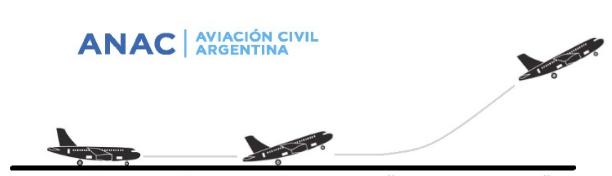

El transporte aéreo o transporte por avión es el servicio de trasladar de un lugar a otro, pasajeros o cargamento, mediante la utilización de aeronaves dentro de un espacio aéreo.

Para este trabajo se extrajo información de los **aterrizajes y despegues de los aeropuertos de Argentina de los años 2020 y 2022**, procesados por la Administración Nacional de Aviación Civil (ANAC).

Además de explorar cuales son las aerolineas más elegidas, cual es la hora y el día más concurrido y las hipótesis a comprobar, la temática a analizar en este dataset es evaluar la distribución de los pasajeros por hora, mes y día y proyectar cuantos tripulantes tendrá un vuelo en el futuro.

En lo personal este dataset es de mi interes ya que fue el que elegí para hacer el proyecto final en el curso de data analytics de Coderhose. En esa oportunidad use la base de datos desde enero 2021 hasta junio 2022 porque eran los datos publicados en ese momento. Para hacer el proyecto final del curso de data science volví a consultar la página y encontré que el dataset del año 2020 estaba completo junto con el del 2022.
A continuación dejo un link de mi proyecto final del curso de data analytics: https://www.novypro.com/project/análisis-de-vuelos-argentinos-2021-2022-power-bi

##Descripción de variables de interés
Fecha UTC: Fecha en la cual aterriza o despega el vuelo.

Hora UTC: Hora UTC (Tiempo Universal Coordinado) . Al evaluar el dato, considerar que Argentina tiene hora oficial UTC -3.

Clase de Vuelo (todos los vuelos): Incluye la clase del vuelo.

Clasificación Vuelo: Clasificación del tipo de vuelo: Cabotaje o Internacional

Tipo de Movimiento: Clasificación del tipo de movimiento. Se considera “Movimiento” a una operación, sea aterrizaje o despegue.  

Aeropuerto: Nombre del aeropuerto código FAA.

Origen / Destino: Se utiliza el código FAA para aeropuertos nacionales y OACI para aeropuertos extranjeros.

Aerolinea Nombre: Nombre de la línea aérea.

Aeronave: Código para identificar a los fabricantes de la aeronaves con la designación específica del modelo del avión.

Pasajeros: Cantidad de pasajeros operación individual (despegue/aterrizaje). Para vuelos de cabotaje se registra despegue y aterrizaje. Al analizar un Aeropuerto individual se debe tomar el dato de esta columna.

PAX: 1pax= 1tarjeta de embarque. Usar esta columna al analizar la cantidad de pasajeros cabotaje a nivel total país. Al analizar los pasajeros internacionales es indiferente usar esta columna o la anterior.

Calidad dato: Detalla la calidad del dato cargado en la base de
datos nacional.


Fuente: https://datos.gob.ar/dataset/transporte-aterrizajes-despegues-procesados-por-administracion-nacional-aviacion-civil-anac


#Dataset Import
---
Importación de 3 BD desde GitHub por el tamaño máximo permitido por GitHub de 25MB.

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/FlorenciaBezmalinovich/Proyectos_ML/main/Proyecto_Final_DS/Archivos_Soporte/2020-informe-ministerio.csv"
df_flight_dirty_1= pd.read_csv(url, delimiter=';', encoding='utf-8')

url="https://raw.githubusercontent.com/FlorenciaBezmalinovich/Proyectos_ML/main/Proyecto_Final_DS/Archivos_Soporte/1_2022_informe_ministerio.csv"
df_flight_dirty_2= pd.read_csv(url, delimiter=';', encoding='utf-8')

url="https://raw.githubusercontent.com/FlorenciaBezmalinovich/Proyectos_ML/main/Proyecto_Final_DS/Archivos_Soporte/2_2022_informe_ministerio.csv"
df_flight_dirty_3= pd.read_csv(url, delimiter=';', encoding='utf-8')

#2° Estructuración - Union de los 3 datasets para estandarizar la fuente de datos.
df_flight_dirty_concat = pd.concat([df_flight_dirty_1, df_flight_dirty_2, df_flight_dirty_3] , axis=0)

<ipython-input-5-feb3a3533e2d>:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flight_dirty_1= pd.read_csv(url, delimiter=';', encoding='utf-8')
<ipython-input-5-feb3a3533e2d>:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flight_dirty_2= pd.read_csv(url, delimiter=';', encoding='utf-8')


Descubrimiento de datos crudos. Comprender los datos, la estructura, tipos y cantidad de observaciones vacias o rellenas.

In [ ]:
df_flight_dirty_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690629 entries, 0 to 233003
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Fecha                              212726 non-null  object
 1   Hora UTC                           690629 non-null  object
 2   Clase de Vuelo (todos los vuelos)  690629 non-null  object
 3   Clasificación Vuelo                690629 non-null  object
 4   Tipo de Movimiento                 690629 non-null  object
 5   Aeropuerto                         690629 non-null  object
 6   Origen / Destino                   690629 non-null  object
 7   Aerolinea Nombre                   690629 non-null  object
 8   Aeronave                           690629 non-null  object
 9   Pasajeros                          690629 non-null  int64 
 10  PAX                                690629 non-null  object
 11  Calidad dato                       690629 non-null  objec

In [ ]:
#Renombro la columna "Fecha" del dataset con datos del año 2020 para que quede igual que "Fecha UTC" de los dataset con datos del año 2022.
import pandas as pd

df_flight_dirty_1.rename(columns={'Fecha': 'Fecha UTC'}, inplace=True)
df_flight_dirty_concat = pd.concat([df_flight_dirty_1, df_flight_dirty_2, df_flight_dirty_3] , axis=0)
df_flight_dirty_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690629 entries, 0 to 233003
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Fecha UTC                          690629 non-null  object
 1   Hora UTC                           690629 non-null  object
 2   Clase de Vuelo (todos los vuelos)  690629 non-null  object
 3   Clasificación Vuelo                690629 non-null  object
 4   Tipo de Movimiento                 690629 non-null  object
 5   Aeropuerto                         690629 non-null  object
 6   Origen / Destino                   690629 non-null  object
 7   Aerolinea Nombre                   690629 non-null  object
 8   Aeronave                           690629 non-null  object
 9   Pasajeros                          690629 non-null  int64 
 10  PAX                                690629 non-null  object
 11  Calidad dato                       690629 non-null  

<Axes: >

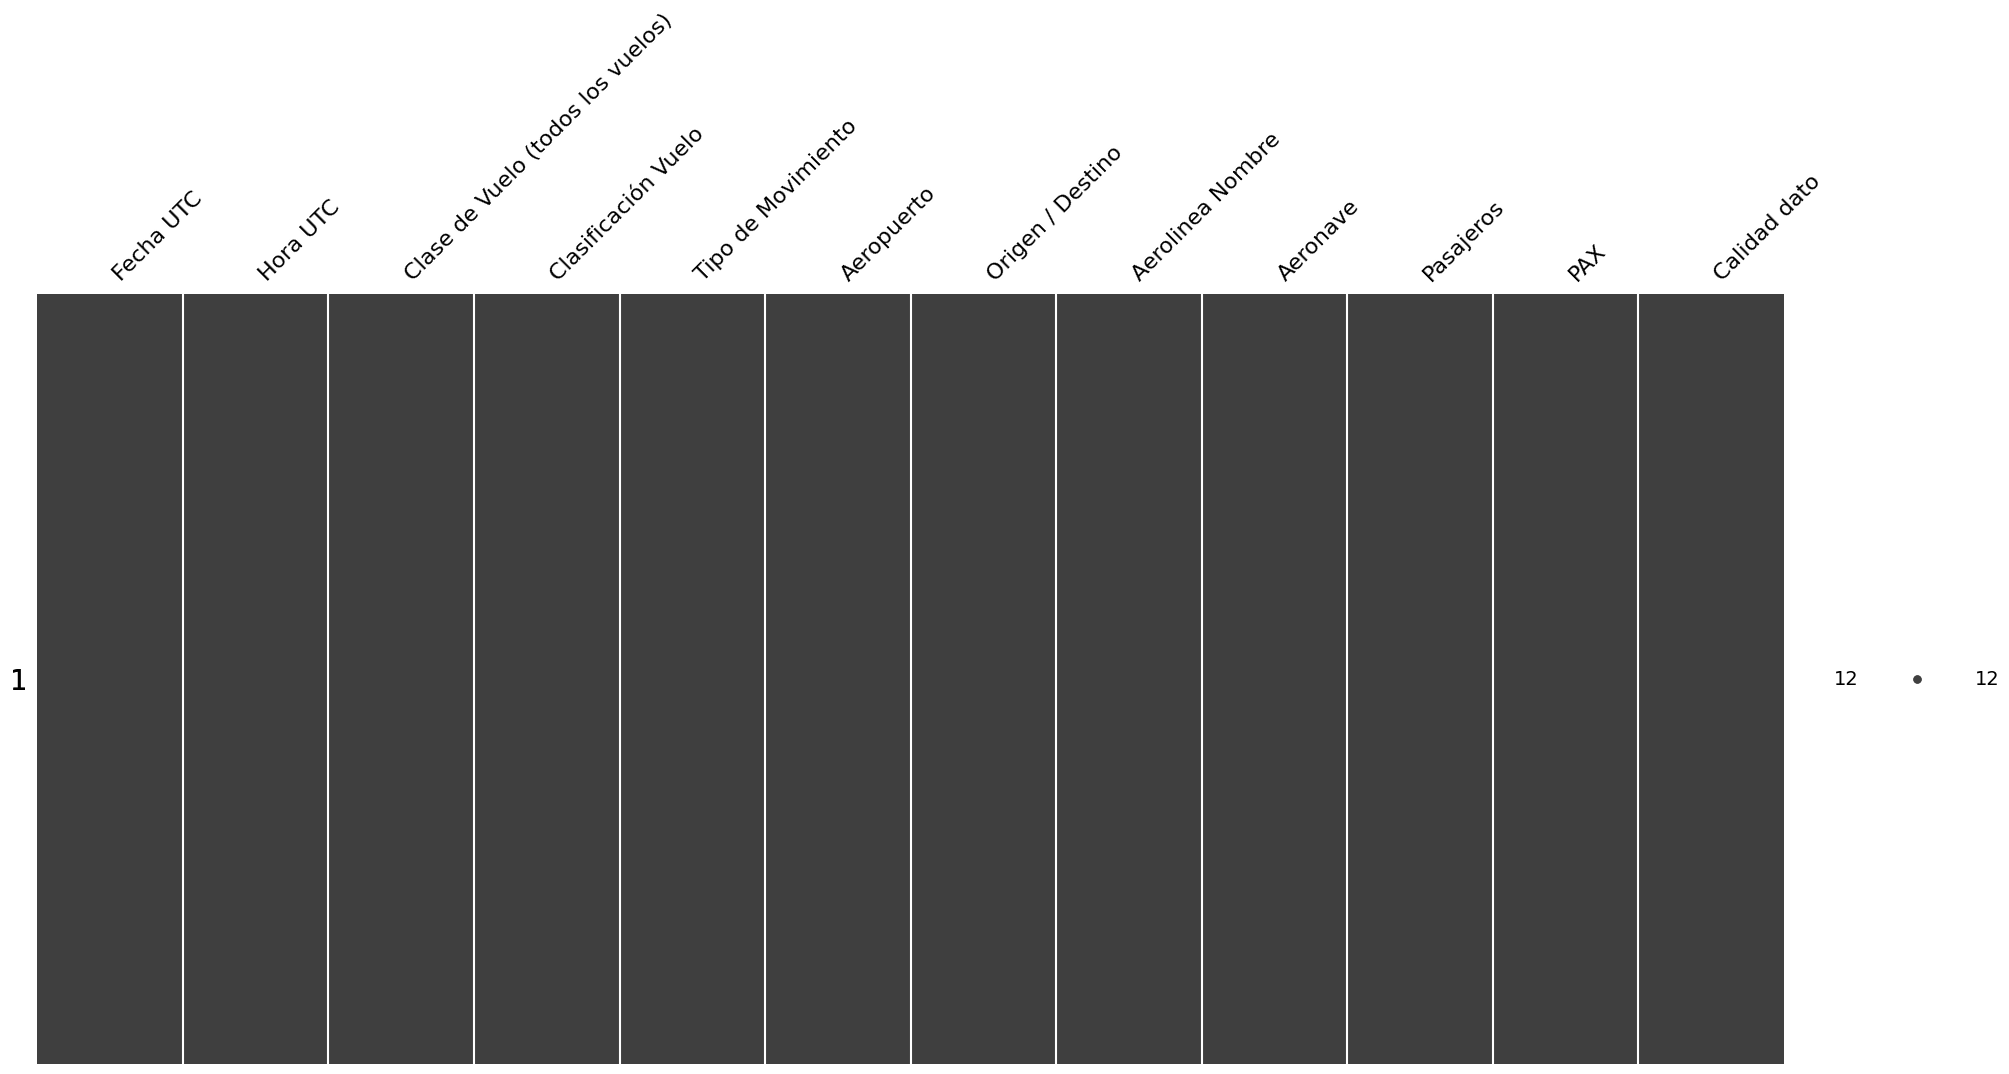

In [ ]:
#Visualizar datos nulos
import missingno as msno
%matplotlib inline
msno.matrix(df_flight_dirty_concat.sample(1)) #Cuento 1 solo para que código corra pero todas las observaciones cuentan los 12 datos.
#Conclusión: Todas las líneas tienen datos. Ver que datos contienen.

In [ ]:
#Visualizar datos con valores iguales a '0' en cada columna
conteo_valores_cero = (df_flight_dirty_concat == '0').sum()
print(conteo_valores_cero)
#Conclusión: en 3 variables hay datos iguales a '0'

Fecha UTC                                 0
Hora UTC                                  0
Clase de Vuelo (todos los vuelos)         0
Clasificación Vuelo                       0
Tipo de Movimiento                        0
Aeropuerto                                0
Origen / Destino                          0
Aerolinea Nombre                     286620
Aeronave                             123400
Pasajeros                                 0
PAX                                   53309
Calidad dato                              0
dtype: int64


Clearing about Raw Data - Limpieza de datos // Data Transformation

Eliminar los datos que no brinden información extra como los duplicados, revisar datos faltantes, etc. Esta propiedad estandariza el formato de las columnas (float, datatimes, etc).

In [ ]:
#Agregar 'ID' secuencial al dataset para identificar cada observación
import pandas as pd

id_column = pd.Series(range(1, len(df_flight_dirty_concat) + 1))

df_flight_dirty_concat['ID'] = id_column

columna_id = df_flight_dirty_concat.pop('ID')
df_flight_dirty_concat.insert(2, 'ID', columna_id)

In [ ]:
#Eliminar columna que con 100% de seguridad no será utilizada aplicando diccionario
import pandas as pd

columna_a_eliminar = ['Calidad dato']
df_flight_dirty_concat = df_flight_dirty_concat.drop(columns=columna_a_eliminar)

print(df_flight_dirty_concat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690629 entries, 0 to 233003
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Fecha UTC                          690629 non-null  object
 1   Hora UTC                           690629 non-null  object
 2   ID                                 690629 non-null  int64 
 3   Clase de Vuelo (todos los vuelos)  690629 non-null  object
 4   Clasificación Vuelo                690629 non-null  object
 5   Tipo de Movimiento                 690629 non-null  object
 6   Aeropuerto                         690629 non-null  object
 7   Origen / Destino                   690629 non-null  object
 8   Aerolinea Nombre                   690629 non-null  object
 9   Aeronave                           690629 non-null  object
 10  Pasajeros                          690629 non-null  int64 
 11  PAX                                690629 non-null  

In [ ]:
#Advertencia de que la columna 'PAX' está separada por ',' y es tipo objeto. Agregar '.0' a enteros y reemplazar ',' por '.' en flotantes.
def agregar_decimal(valor):
    if not isinstance(valor, str):
        valor = str(valor)
    if ',' not in valor:
        valor += ".0"
    return valor

#Aplica la función a la columna 'PAX'
df_flight_dirty_concat['PAX'] = df_flight_dirty_concat['PAX'].apply(agregar_decimal)

In [ ]:
df_flight_dirty_concat['PAX'] = df_flight_dirty_concat['PAX'].str.replace(',', '.')

In [ ]:
df_flight_dirty_concat['PAX'] = df_flight_dirty_concat['PAX'].astype(float)

In [ ]:
#Advertencia de que la columna 'Hora_UTC' es objeto. Crear una columna de fecha y hora utilizando una fecha fija y función para convertir el tipo de dato.

import pandas as pd
from datetime import datetime

def convertir_a_time(x):
    try:
        return datetime.strptime(x, '%H:%M').time()
    except ValueError:
        return None

df_flight_dirty_concat['Hora UTC'] = df_flight_dirty_concat['Hora UTC'].apply(convertir_a_time)

#Fecha fija
fecha_fija = datetime(2100, 1, 1)
df_flight_dirty_concat['Hora UTC'] = df_flight_dirty_concat['Hora UTC'].apply(lambda x: datetime.combine(fecha_fija.date(), x) if x is not None else None)

In [ ]:
#Advertencia de que la columna 'Fecha UTC' es objeto
import pandas as pd
from datetime import datetime

df_flight_dirty_concat['Fecha UTC'] = pd.to_datetime(df_flight_dirty_concat['Fecha UTC'])

df_flight_dirty_concat.info()

<ipython-input-12-89d893c520e9>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_flight_dirty_concat['Fecha UTC'] = pd.to_datetime(df_flight_dirty_concat['Fecha UTC'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 690629 entries, 0 to 233003
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Fecha UTC                          690629 non-null  datetime64[ns]
 1   Hora UTC                           690629 non-null  datetime64[ns]
 2   ID                                 690629 non-null  int64         
 3   Clase de Vuelo (todos los vuelos)  690629 non-null  object        
 4   Clasificación Vuelo                690629 non-null  object        
 5   Tipo de Movimiento                 690629 non-null  object        
 6   Aeropuerto                         690629 non-null  object        
 7   Origen / Destino                   690629 non-null  object        
 8   Aerolinea Nombre                   690629 non-null  object        
 9   Aeronave                           690629 non-null  object        
 10  Pasajeros           

In [ ]:
#Adevertencia de que la variable "Clasificación Vuelo" no está igual en todas als observaciones: Consulta
import pandas as pd

conteo_valores = df_flight_dirty_concat['Clasificación Vuelo'].value_counts()
print(conteo_valores)

Doméstico        557203
Internacional    112008
Dom               18718
Inter              2700
Name: Clasificación Vuelo, dtype: int64


In [ ]:
#Variable "Clasificación Vuelo": Normalizado y nueva consulta
import pandas as pd

#Reemplazar múltiples valores a la vez utilizando un diccionario
reemplazos = {'Dom': 'Doméstico', 'Inter': 'Internacional'}
df_flight_dirty_concat['Clasificación Vuelo'] = df_flight_dirty_concat['Clasificación Vuelo'].replace(reemplazos)

conteo_valores = df_flight_dirty_concat['Clasificación Vuelo'].value_counts()
print(conteo_valores)

Doméstico        575921
Internacional    114708
Name: Clasificación Vuelo, dtype: int64


In [ ]:
#Adevertencia de que la variable "Aerolinea Nombre" contiene valores '0': Consulta
import pandas as pd

conteo_valores_air = df_flight_dirty_concat['Aerolinea Nombre'].value_counts()
print(conteo_valores_air)

0                                           286620
AEROLINEAS ARGENTINAS SA                    202843
JETSMART AIRLINES S.A.                       32369
FB LÍNEAS AÉREAS - FLYBONDI                  29939
AUSTRAL LINEAS AEREAS-CIELOS DEL SUR S.A     20164
                                             ...  
IRIGOYEN MAURICIO DANIEL                         1
AERO CLUB BARILOCHE                              1
INVERSIONES STANFORD S.A. (CHILE)                1
IGUACU MAQUINAS AGRICOLAS LTDA                   1
VARIG                                            1
Name: Aerolinea Nombre, Length: 1399, dtype: int64


In [ ]:
#Normalizar la variable "Aerolinea Nombre": Normalizado y consulta
import pandas as pd

#Reemplazar múltiples valores de a uno la vez
df_flight_dirty_concat['Aerolinea Nombre'] = df_flight_dirty_concat['Aerolinea Nombre'].str.replace('.', '')
df_flight_dirty_concat['Aerolinea Nombre'] = df_flight_dirty_concat['Aerolinea Nombre'].str.replace('  ', ' ')

conteo_valores_air = df_flight_dirty_concat['Aerolinea Nombre'].value_counts()
print(conteo_valores_air)

#Conclusión: Se redujo la longitud de la variable de 1399 a 1388.

<ipython-input-16-58baaa502c4e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_flight_dirty_concat['Aerolinea Nombre'] = df_flight_dirty_concat['Aerolinea Nombre'].str.replace('.', '')


0                                          286620
AEROLINEAS ARGENTINAS SA                   202843
JETSMART AIRLINES SA                        32369
FB LÍNEAS AÉREAS - FLYBONDI                 29939
AUSTRAL LINEAS AEREAS-CIELOS DEL SUR SA     20164
                                            ...  
IRIGOYEN MAURICIO DANIEL                        1
AERO CLUB BARILOCHE                             1
INVERSIONES STANFORD SA (CHILE)                 1
IGUACU MAQUINAS AGRICOLAS LTDA                  1
VARIG                                           1
Name: Aerolinea Nombre, Length: 1388, dtype: int64


In [ ]:
#Completar "Aerolinea Nombre". Como se vio anteriormente la columna cuenta con 690629 observaciones donde 286620 contienen '0', es decir, su  41,5% está falto de dato. A los fines de la exposición de la información solo deseo ver las aeronaves del año 2022 y la de los vuelos regulares.
#Se procede a realizar un tratamiento de las observaciones cuta valor en la variable 'Aerolinea Nombre' == 0 de las observaciones son del año 2022 y la clase de vuelos es regular.

#El nombre del día es un dato que usaré para completar el nombre de la aerolínea.
#Crear columna con el nombre del día en español porque las rutas aeronáuticas se arman por día de la semana.
#Definir el diccionario para mapear días de la semana en inglés a español.
dias_semana_es = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df_flight_dirty_concat['Nombre_Dia'] = df_flight_dirty_concat['Fecha UTC'].dt.day_name()
df_flight_dirty_concat['Nombre_Dia'] = df_flight_dirty_concat['Nombre_Dia'].map(dias_semana_es)
df_flight_dirty_concat.head()

,Fecha UTC,Hora UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia
0,2020-01-01,2100-01-01 00:06:00,1,Regular,Internacional,Aterrizaje,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,239,239.0,Miércoles
1,2020-01-01,2100-01-01 00:08:00,2,Regular,Internacional,Despegue,EZE,SCEL,LAN ARGENTINA SA (LATAM AIRLINES),0,152,152.0,Miércoles
2,2020-01-01,2100-01-01 00:10:00,3,Regular,Doméstico,Aterrizaje,PAL,BAR,JETSMART AIRLINES SA,0,116,58.0,Miércoles
3,2020-01-01,2100-01-01 00:13:00,4,Regular,Internacional,Despegue,EZE,KDFW,AMERICAN AIRLINES INC,0,255,255.0,Miércoles
4,2020-01-01,2100-01-01 00:13:00,5,Regular,Doméstico,Aterrizaje,PAL,DOZ,JETSMART AIRLINES SA,0,146,73.0,Miércoles


In [ ]:
#Crear la nueva columna sintética combinando las columnas que determinan la aerolinea solo de los vuelos regulares que son los que se pueden inferir.
df_flight_dirty_concat["variable_sintetica"] = df_flight_dirty_concat["Aeronave"].astype(str) + "_" + df_flight_dirty_concat["Aeropuerto"].astype(str) + "_" + df_flight_dirty_concat["Origen / Destino"].astype(str) + "_" + df_flight_dirty_concat["Nombre_Dia"].astype(str)+ "_" + df_flight_dirty_concat["Clase de Vuelo (todos los vuelos)"].astype(str)
df_flight_dirty_concat.head()

,Fecha UTC,Hora UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia,variable_sintetica
0,2020-01-01,2100-01-01 00:06:00,1,Regular,Internacional,Aterrizaje,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,239,239.0,Miércoles,0_EZE_LEMD_Miércoles_Regular
1,2020-01-01,2100-01-01 00:08:00,2,Regular,Internacional,Despegue,EZE,SCEL,LAN ARGENTINA SA (LATAM AIRLINES),0,152,152.0,Miércoles,0_EZE_SCEL_Miércoles_Regular
2,2020-01-01,2100-01-01 00:10:00,3,Regular,Doméstico,Aterrizaje,PAL,BAR,JETSMART AIRLINES SA,0,116,58.0,Miércoles,0_PAL_BAR_Miércoles_Regular
3,2020-01-01,2100-01-01 00:13:00,4,Regular,Internacional,Despegue,EZE,KDFW,AMERICAN AIRLINES INC,0,255,255.0,Miércoles,0_EZE_KDFW_Miércoles_Regular
4,2020-01-01,2100-01-01 00:13:00,5,Regular,Doméstico,Aterrizaje,PAL,DOZ,JETSMART AIRLINES SA,0,146,73.0,Miércoles,0_PAL_DOZ_Miércoles_Regular


In [ ]:
aerolineas_2022 = df_flight_dirty_concat[
    (df_flight_dirty_concat['Fecha UTC'].dt.year == 2022) &
    (df_flight_dirty_concat["Clase de Vuelo (todos los vuelos)"] == "Regular")
]
aerolineas_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258937 entries, 0 to 233003
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Fecha UTC                          258937 non-null  datetime64[ns]
 1   Hora UTC                           258937 non-null  datetime64[ns]
 2   ID                                 258937 non-null  int64         
 3   Clase de Vuelo (todos los vuelos)  258937 non-null  object        
 4   Clasificación Vuelo                258937 non-null  object        
 5   Tipo de Movimiento                 258937 non-null  object        
 6   Aeropuerto                         258937 non-null  object        
 7   Origen / Destino                   258937 non-null  object        
 8   Aerolinea Nombre                   258937 non-null  object        
 9   Aeronave                           258937 non-null  object        
 10  Pasajeros           

In [ ]:
aerolineas = aerolineas_2022[['variable_sintetica', 'Aerolinea Nombre']].copy()
aerolineas['Concatenada'] = aerolineas_2022['Aerolinea Nombre'] + '_' + aerolineas_2022['variable_sintetica']
aerolineas.head()

,variable_sintetica,Aerolinea Nombre,Concatenada
0,BO-737-8SH_AER_ECA_Sábado_Regular,AEROLINEAS ARGENTINAS SA,AEROLINEAS ARGENTINAS SA_BO-737-8SH_AER_ECA_Sá...
1,BO-B737-8_AER_SAL_Sábado_Regular,AEROLINEAS ARGENTINAS SA,AEROLINEAS ARGENTINAS SA_BO-B737-8_AER_SAL_Sáb...
2,AIB-A320-232_IGU_AER_Sábado_Regular,JETSMART AIRLINES SA,JETSMART AIRLINES SA_AIB-A320-232_IGU_AER_Sába...
3,BO-B737-81D_AER_GAL_Sábado_Regular,AEROLINEAS ARGENTINAS SA,AEROLINEAS ARGENTINAS SA_BO-B737-81D_AER_GAL_S...
4,0_EZE_KDFW_Sábado_Regular,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC_0_EZE_KDFW_Sábado_Regular


In [ ]:
#Eliminar filas duplicadas en función de la columna 'Concatenada' estableciendo 'keep' en 'first' para conservar la primera ocurrencia de cada valor duplicado.
aerolineas = aerolineas.drop_duplicates(subset='Concatenada', keep='first')
aerolineas.head()

,variable_sintetica,Aerolinea Nombre,Concatenada
0,BO-737-8SH_AER_ECA_Sábado_Regular,AEROLINEAS ARGENTINAS SA,AEROLINEAS ARGENTINAS SA_BO-737-8SH_AER_ECA_Sá...
1,BO-B737-8_AER_SAL_Sábado_Regular,AEROLINEAS ARGENTINAS SA,AEROLINEAS ARGENTINAS SA_BO-B737-8_AER_SAL_Sáb...
2,AIB-A320-232_IGU_AER_Sábado_Regular,JETSMART AIRLINES SA,JETSMART AIRLINES SA_AIB-A320-232_IGU_AER_Sába...
3,BO-B737-81D_AER_GAL_Sábado_Regular,AEROLINEAS ARGENTINAS SA,AEROLINEAS ARGENTINAS SA_BO-B737-81D_AER_GAL_S...
4,0_EZE_KDFW_Sábado_Regular,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC_0_EZE_KDFW_Sábado_Regular


In [ ]:
#Crear una función para completar 'Aerolinea Nombre'
def completar_aerolinea(row):
    if (
        row['Aerolinea Nombre'] == '0' and
        row['Fecha UTC'].year == 2022 and
        row["Clase de Vuelo (todos los vuelos)"] == "Regular"
    ):
        matching_row = aerolineas[aerolineas['variable_sintetica'] == row['variable_sintetica']]
        if not matching_row.empty:
            return matching_row['Aerolinea Nombre'].iloc[0]

    #Conservar el valor actual de 'Aerolinea Nombre'
    return row['Aerolinea Nombre']

#Aplicar la función a la columna 'Aerolinea Nombre' en df_flight_dirty_concat
df_flight_dirty_concat['Aerolinea Nombre'] = df_flight_dirty_concat.apply(completar_aerolinea, axis=1)

In [ ]:
df_flight_dirty_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690629 entries, 0 to 233003
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Fecha UTC                          690629 non-null  datetime64[ns]
 1   Hora UTC                           690629 non-null  datetime64[ns]
 2   ID                                 690629 non-null  int64         
 3   Clase de Vuelo (todos los vuelos)  690629 non-null  object        
 4   Clasificación Vuelo                690629 non-null  object        
 5   Tipo de Movimiento                 690629 non-null  object        
 6   Aeropuerto                         690629 non-null  object        
 7   Origen / Destino                   690629 non-null  object        
 8   Aerolinea Nombre                   690629 non-null  object        
 9   Aeronave                           690629 non-null  object        
 10  Pasajeros           

In [ ]:
#Para los vuelos del período 2020 no es importante el dato del nombre de la aerolinea así que no lo voy a buscar y dentro de los vuelos 2022 y solo serán buscados los regulares:

filas_aerolinea_cero = df_flight_dirty_concat[
    (df_flight_dirty_concat['Fecha UTC'].dt.year == 2022) &
    (df_flight_dirty_concat["Clase de Vuelo (todos los vuelos)"] == "Regular") &
    (df_flight_dirty_concat["Aerolinea Nombre"] == "0")
]

filas_aerolinea_cero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 4457 to 225847
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha UTC                          88 non-null     datetime64[ns]
 1   Hora UTC                           88 non-null     datetime64[ns]
 2   ID                                 88 non-null     int64         
 3   Clase de Vuelo (todos los vuelos)  88 non-null     object        
 4   Clasificación Vuelo                88 non-null     object        
 5   Tipo de Movimiento                 88 non-null     object        
 6   Aeropuerto                         88 non-null     object        
 7   Origen / Destino                   88 non-null     object        
 8   Aerolinea Nombre                   88 non-null     object        
 9   Aeronave                           88 non-null     object        
 10  Pasajeros                        

In [ ]:
#Extraer los valores de la columna "ID"
valores_id = filas_aerolinea_cero['ID']

#Convierte los valores en una lista (array)
valores_id_lista = valores_id.tolist()

#Mostrar la lista de valores de la columna "ID"
print(valores_id_lista)

[4458, 4546, 6698, 10477, 12448, 15876, 15896, 22109, 22170, 29876, 30192, 31774, 31817, 32254, 32308, 33677, 37347, 40184, 40295, 42619, 42770, 42955, 43481, 49899, 75892, 79316, 79470, 82229, 82327, 89617, 89938, 105193, 124445, 129861, 134708, 134792, 146133, 146297, 146531, 147746, 150673, 151211, 159009, 159148, 181065, 187377, 187492, 188631, 192253, 193327, 193661, 198249, 216081, 219088, 222187, 222872, 223073, 225729, 231502, 2384, 2481, 12010, 12078, 12803, 21423, 21525, 26791, 30099, 36397, 37087, 47800, 54524, 67459, 68435, 69924, 70008, 84046, 87750, 90071, 137123, 152239, 158548, 166396, 190089, 197782, 197895, 225749, 225848]


In [ ]:
#Lista de ID a desestimar
ids_a_desestimar = [4458, 4546, 6698, 10477, 12448, 15876, 15896, 22109, 22170, 29876, 30192, 31774, 31817, 32254, 32308, 33677, 37347, 40184, 40295, 42619, 42770, 42955, 43481, 49899, 75892, 79316, 79470, 82229, 82327, 89617, 89938, 105193, 124445, 129861, 134708, 134792, 146133, 146297, 146531, 147746, 150673, 151211, 159009, 159148, 181065, 187377, 187492, 188631, 192253, 193327, 193661, 198249, 216081, 219088, 222187, 222872, 223073, 225729, 231502, 2384, 2481, 12010, 12078, 12803, 21423, 21525, 26791, 30099, 36397, 37087, 47800, 54524, 67459, 68435, 69924, 70008, 84046, 87750, 90071, 137123, 152239, 158548, 166396, 190089, 197782, 197895, 225749, 225848]

#Filtra las observaciones en df_flight_dirty_concat donde la columna "ID" no está en la lista de IDs a desestimar
vuelos_2022_con_aerolineas = df_flight_dirty_concat[~df_flight_dirty_concat['ID'].isin(ids_a_desestimar) & (df_flight_dirty_concat['Fecha UTC'].dt.year == 2022)].copy()
vuelos_2022_con_aerolineas.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 477727 entries, 0 to 233003
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Fecha UTC                          477727 non-null  datetime64[ns]
 1   Hora UTC                           477727 non-null  datetime64[ns]
 2   ID                                 477727 non-null  int64         
 3   Clase de Vuelo (todos los vuelos)  477727 non-null  object        
 4   Clasificación Vuelo                477727 non-null  object        
 5   Tipo de Movimiento                 477727 non-null  object        
 6   Aeropuerto                         477727 non-null  object        
 7   Origen / Destino                   477727 non-null  object        
 8   Aerolinea Nombre                   477727 non-null  object        
 9   Aeronave                           477727 non-null  object        
 10  Pasajeros           

#Enriquecimiento

Para enriquecer mi dataset y mi análisis dividiré el mismo por año ya que los datos del año 2020 solo me interesan a fines comparativos para validar una de mis hipótesis pero para describir variables y para predecir la cantidad de pasajeros de un vuelo esta información no me sirve por ser atípica y, lo más importante, sesga mi análisis.

In [ ]:
#Crear la columna 'Periodo_year' que contiene el año extraído de 'Fecha_UTC'
df_flight_dirty_concat['Periodo_year'] = df_flight_dirty_concat['Fecha UTC'].dt.year

df_flight_dirty_concat.head()

,Fecha UTC,Hora UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia,variable_sintetica,Periodo_year
0,2020-01-01,2100-01-01 00:06:00,1,Regular,Internacional,Aterrizaje,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,239,239.0,Miércoles,0_EZE_LEMD_Miércoles_Regular,2020
1,2020-01-01,2100-01-01 00:08:00,2,Regular,Internacional,Despegue,EZE,SCEL,LAN ARGENTINA SA (LATAM AIRLINES),0,152,152.0,Miércoles,0_EZE_SCEL_Miércoles_Regular,2020
2,2020-01-01,2100-01-01 00:10:00,3,Regular,Doméstico,Aterrizaje,PAL,BAR,JETSMART AIRLINES SA,0,116,58.0,Miércoles,0_PAL_BAR_Miércoles_Regular,2020
3,2020-01-01,2100-01-01 00:13:00,4,Regular,Internacional,Despegue,EZE,KDFW,AMERICAN AIRLINES INC,0,255,255.0,Miércoles,0_EZE_KDFW_Miércoles_Regular,2020
4,2020-01-01,2100-01-01 00:13:00,5,Regular,Doméstico,Aterrizaje,PAL,DOZ,JETSMART AIRLINES SA,0,146,73.0,Miércoles,0_PAL_DOZ_Miércoles_Regular,2020


In [ ]:
#Crear nuevos DataFrames
vuelos_2020 = df_flight_dirty_concat[df_flight_dirty_concat['Periodo_year'] == 2020]
vuelos_2022 = df_flight_dirty_concat[df_flight_dirty_concat['Periodo_year'] == 2022]

#Validación de la limpieza:
#Contar los vuelos de 2020
conteo_vuelos_2020 = vuelos_2020['Periodo_year'].value_counts()
conteo_vuelos_2022 = vuelos_2022['Periodo_year'].value_counts()

#Imprimir el conteo de vuelos de 2020
print(conteo_vuelos_2020)
print(conteo_vuelos_2022)

2020    212726
Name: Periodo_year, dtype: int64
2022    477903
Name: Periodo_year, dtype: int64


#Publicación

Ya validado mi dataset final lo puedo publicar enviadoseló a eventuales expertos en modeling, en este caso soy yo misma, bajo el nombre vuelos_2022_con_aerolineas y vuelos_2020 dependiendo del período a analizar.

#EDA

##Gráfico 1
¿Cual es la hora pico de vuelos en el territorio argentino?

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
mpl.style.use('bmh')

In [ ]:
vuelos_2022_con_aerolineas.dtypes

Fecha UTC                            datetime64[ns]
Hora UTC                             datetime64[ns]
ID                                            int64
Clase de Vuelo (todos los vuelos)            object
Clasificación Vuelo                          object
Tipo de Movimiento                           object
Aeropuerto                                   object
Origen / Destino                             object
Aerolinea Nombre                             object
Aeronave                                     object
Pasajeros                                     int64
PAX                                         float64
Nombre_Dia                                   object
variable_sintetica                           object
dtype: object

In [ ]:
#Crear conteo los vuelos por horas.
import pandas as pd
from datetime import datetime

vuelos_2022_con_aerolineas.set_index('Hora UTC', inplace=True)

flights_per_hour = vuelos_2022_con_aerolineas.resample('H').count()

In [ ]:
flights_per_hour.head()

,Fecha UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia,variable_sintetica
Hora UTC,,,,,,,,,,,,,
2100-01-01 00:00:00,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534
2100-01-01 01:00:00,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355
2100-01-01 02:00:00,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189
2100-01-01 03:00:00,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152
2100-01-01 04:00:00,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853


In [ ]:
flights_per_hour.head()

,Fecha UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia,variable_sintetica
Hora UTC,,,,,,,,,,,,,
2100-01-01 00:00:00,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534
2100-01-01 01:00:00,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355
2100-01-01 02:00:00,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189
2100-01-01 03:00:00,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152
2100-01-01 04:00:00,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853


In [ ]:
flights_per_hour.reset_index('Hora UTC', inplace=True)

In [ ]:
flights_per_hour['Hora UTC'] = flights_per_hour['Hora UTC'].dt.strftime('%H:%M')
flights_per_hour.head()

,Hora UTC,Fecha UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia,variable_sintetica
0,00:00,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534,16534
1,01:00,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355,13355
2,02:00,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189,10189
3,03:00,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152,7152
4,04:00,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853,4853


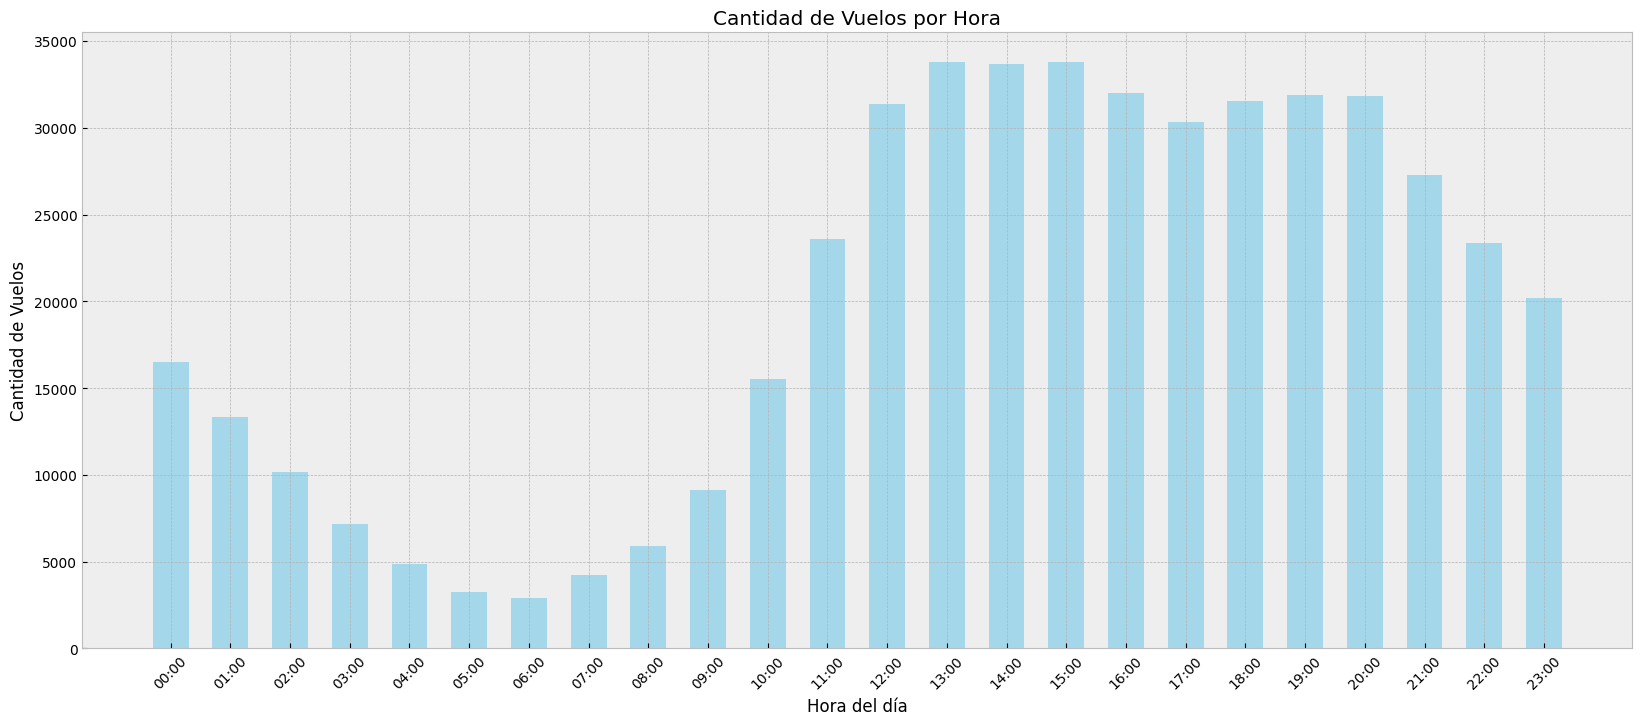

In [ ]:

plt.figure(figsize=(20, 8))
plt.bar(flights_per_hour['Hora UTC'], flights_per_hour['ID'], width=0.6, color='skyblue', alpha=0.7)

plt.title('Cantidad de Vuelos por Hora')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(flights_per_hour['Hora UTC'])

plt.xticks(rotation=45)

plt.show()

In [ ]:
#Quitar "Fecha_Hora" como index
vuelos_2022_con_aerolineas.reset_index('Hora UTC', inplace=True)

In [ ]:
#Validación del gráfico
import pandas as pd
from statistics import mode
from datetime import datetime

vuelos_2022_con_aerolineas['Hora_str'] = vuelos_2022_con_aerolineas['Hora UTC'].apply(lambda x: x.strftime('%H:%M'))

moda_hora = mode(vuelos_2022_con_aerolineas['Hora_str'])

print("Moda de la hora:", moda_hora)

Moda de la hora: 15:00


##Gráfico 2
¿Cual es el día de la semana donde hay más aeronaves sobrevolando el territorio nacional?

In [ ]:
#Agregar 'ID' al dataset
import pandas as pd

id_column = pd.Series(range(1, len(vuelos_2022_con_aerolineas) + 1))

vuelos_2022_con_aerolineas['ID'] = id_column

columna_id = vuelos_2022_con_aerolineas.pop('ID')
vuelos_2022_con_aerolineas.insert(2, 'ID', columna_id)

In [ ]:
#Crear un dataframe que agrupe los vuelos por los días de la semana
ordered_days = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

flights_per_day = vuelos_2022_con_aerolineas.groupby('Nombre_Dia')['ID'].count()
flights_per_day = flights_per_day.reindex(ordered_days)

In [ ]:
flights_per_day.head(7)

Nombre_Dia
Domingo      64001
Lunes        68145
Martes       67918
Miércoles    67893
Jueves       70817
Viernes      70291
Sábado       68662
Name: ID, dtype: int64

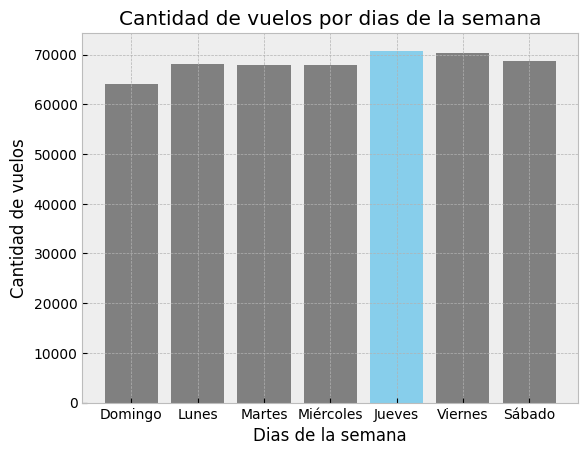

In [ ]:
import numpy as np

#Encontrar el índice de la barra con más vuelos
max_index = np.argmax(flights_per_day.values)
colors = ['gray' if i != max_index else 'skyblue' for i in range(len(flights_per_day))]

plt.bar(flights_per_day.index, flights_per_day.values, color=colors)
plt.xlabel('Dias de la semana')
plt.ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos por dias de la semana')
plt.show()

In [ ]:
#Validación del gráfico.
import statistics
mode_day = statistics.mode(vuelos_2022_con_aerolineas['Nombre_Dia'])
print("La moda de los datos es el día:", mode_day)

La moda de los datos es el día: Jueves


##Grafico 3
¿Cuales son las 5 aerolineas con más vuelos domésticos en el país (Matplotlib) y cuales con más vuelos internacionales (Seaborn)?

In [ ]:
#Crear un dataframe que filtre los vuelos por su naturaleza de doméstico y desestime las lineas sin nombre de aerolínea.
condition1 = vuelos_2022_con_aerolineas['Aerolinea Nombre'] != '0'
condition2 = vuelos_2022_con_aerolineas['Clasificación Vuelo'] == 'Doméstico'

df_vuelos_domesticos = vuelos_2022_con_aerolineas[condition1 & condition2].copy()
df_vuelos_domesticos.head()

,Hora UTC,Fecha UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia,variable_sintetica,Hora_str
0,2100-01-01 00:01:00,2022-01-01,1,Regular,Doméstico,Aterrizaje,AER,ECA,AEROLINEAS ARGENTINAS SA,BO-737-8SH,138,69.0,Sábado,BO-737-8SH_AER_ECA_Sábado_Regular,00:01
1,2100-01-01 00:05:00,2022-01-01,2,Regular,Doméstico,Aterrizaje,AER,SAL,AEROLINEAS ARGENTINAS SA,BO-B737-8,129,65.0,Sábado,BO-B737-8_AER_SAL_Sábado_Regular,00:05
2,2100-01-01 00:05:00,2022-01-01,3,Regular,Doméstico,Despegue,IGU,AER,JETSMART AIRLINES SA,AIB-A320-232,82,41.0,Sábado,AIB-A320-232_IGU_AER_Sábado_Regular,00:05
3,2100-01-01 00:09:00,2022-01-01,4,Regular,Doméstico,Aterrizaje,AER,GAL,AEROLINEAS ARGENTINAS SA,BO-B737-81D,145,73.0,Sábado,BO-B737-81D_AER_GAL_Sábado_Regular,00:09
6,2100-01-01 00:12:00,2022-01-01,7,No Regular,Doméstico,Despegue,AER,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,0,0.0,Sábado,BO-B-737-76N_AER_EZE_Sábado_No Regular,00:12


In [ ]:
#Crear el dataframe de vuelos domésticos filtrandolo por aerolinea.
domestics_flights_per_airline = df_vuelos_domesticos.groupby('Aerolinea Nombre')['ID'].count()
domestics_flights_per_airline.head()


Aerolinea Nombre
13 DE MAYO SA                         2
167 EAST 63RD HELICOPTER LLC         11
4 G´S AVIATION SERVICES LLC           1
5 PONTAS EMPREENDIMENTOS SPE LTDS     3
5D+ CAPITAL FINANCIAL GROUP           6
Name: ID, dtype: int64

In [ ]:
#Ordenar las aerolineas por orden descendentes para que aparezcan las aerolineas con más vuelos al inicio.
domestics_flights_per_airline = domestics_flights_per_airline.sort_values( ascending=False)
domestics_flights_per_airline.head()

Aerolinea Nombre
AEROLINEAS ARGENTINAS SA       156056
JETSMART AIRLINES SA            24848
FB LÍNEAS AÉREAS - FLYBONDI     24478
LADE                             4208
AMERICAN JET SA                  3688
Name: ID, dtype: int64

In [ ]:
#Filtrar las 5 primeras para mejor visualización.
domestics_flights_per_airline = domestics_flights_per_airline.sort_values( ascending=False)
domestics_flights_per_airline = (domestics_flights_per_airline[:5])

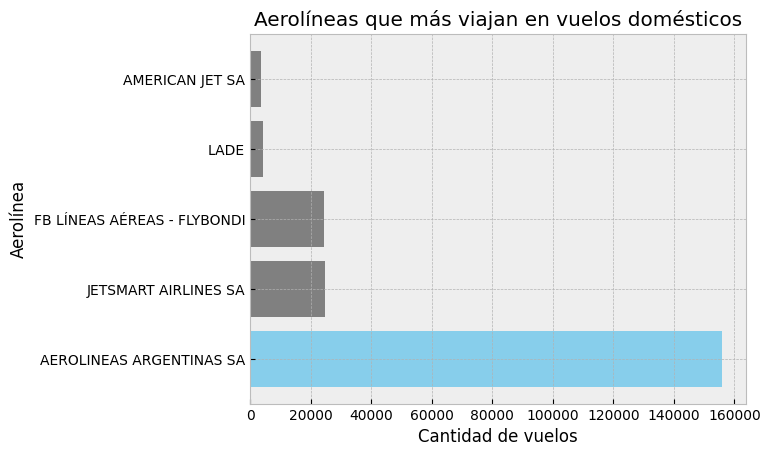

In [ ]:
import numpy as np

max_index = np.argmax(domestics_flights_per_airline.values)
colors = ['grey' if i != max_index else 'skyblue' for i in range(len(domestics_flights_per_airline))]

#Gráfico 3 con Matplotlib
plt.barh(domestics_flights_per_airline.index, domestics_flights_per_airline.values,color=colors)
plt.xlabel('Cantidad de vuelos')
plt.ylabel('Aerolínea')
plt.title('Aerolíneas que más viajan en vuelos domésticos')
plt.show()


In [ ]:
#Crear un dataframe que filtre los vuelos por su naturaleza de internacional y desestime las lineas sin nombre de aerolínea.
condition1 = vuelos_2022_con_aerolineas['Aerolinea Nombre'] != '0'
condition2 = vuelos_2022_con_aerolineas['Clasificación Vuelo'] == 'Internacional'

df_vuelos_internacionales = vuelos_2022_con_aerolineas[condition1 & condition2].copy()
df_vuelos_internacionales.head()

,Hora UTC,Fecha UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia,variable_sintetica,Hora_str
4,2100-01-01 00:09:00,2022-01-01,5,Regular,Internacional,Despegue,EZE,KDFW,AMERICAN AIRLINES INC,0,261,261.0,Sábado,0_EZE_KDFW_Sábado_Regular,00:09
13,2100-01-01 00:43:00,2022-01-01,14,Regular,Internacional,Aterrizaje,EZE,MMMX,AEROVIAS DE MEXICO - AEROMEXICO,0,93,93.0,Sábado,0_EZE_MMMX_Sábado_Regular,00:43
17,2100-01-01 01:03:00,2022-01-01,18,Regular,Internacional,Despegue,EZE,MMUN,AEROLINEAS ARGENTINAS SA,AIB-A330-202,271,271.0,Sábado,AIB-A330-202_EZE_MMUN_Sábado_Regular,01:03
18,2100-01-01 01:10:00,2022-01-01,19,Regular,Internacional,Despegue,EZE,KMIA,AMERICAN AIRLINES INC,0,226,226.0,Sábado,0_EZE_KMIA_Sábado_Regular,01:10
19,2100-01-01 01:10:00,2022-01-01,20,Regular,Internacional,Despegue,EZE,KIAH,UNITED AIRLINES INC (EEUU),0,245,245.0,Sábado,0_EZE_KIAH_Sábado_Regular,01:10


In [ ]:
#Crear el dataframe de vuelos internacionales filtrandolo por aerolinea.

international_flights_per_airline = df_vuelos_internacionales.groupby('Aerolinea Nombre')['ID'].count().reset_index()
international_flights_per_airline.rename(columns={'ID': 'Cantidad de Vuelos'}, inplace=True)

international_flights_per_airline.head()

,Aerolinea Nombre,Cantidad de Vuelos
0,13 DE MAYO SA,2
1,167 EAST 63RD HELICOPTER LLC,2
2,5 PONTAS EMPREENDIMENTOS SPE LTDS,5
3,5D+ CAPITAL FINANCIAL GROUP,10
4,5DCFG,2


In [ ]:
#Ordenar en cada dataframe las aerolineas por orden descendentes para que aparezcan las aerolineas con más vuelos al inicio.
international_flights_per_airline = international_flights_per_airline.sort_values(by='Cantidad de Vuelos', ascending=False)
international_flights_per_airline.head()

,Aerolinea Nombre,Cantidad de Vuelos
46,AEROLINEAS ARGENTINAS SA,15872
252,COMPAÑIA PANAMEÑA DE AVIACION,3445
409,GOL LINHAS AÉREAS SA,3092
534,LATAM AIRLINES GROUP SA(exLAN AIRLINE),2440
744,SKY AIRLINE SA,2415


In [ ]:
international_flights_per_airline = (international_flights_per_airline[:5])
international_flights_per_airline.head()

,Aerolinea Nombre,Cantidad de Vuelos
46,AEROLINEAS ARGENTINAS SA,15872
252,COMPAÑIA PANAMEÑA DE AVIACION,3445
409,GOL LINHAS AÉREAS SA,3092
534,LATAM AIRLINES GROUP SA(exLAN AIRLINE),2440
744,SKY AIRLINE SA,2415


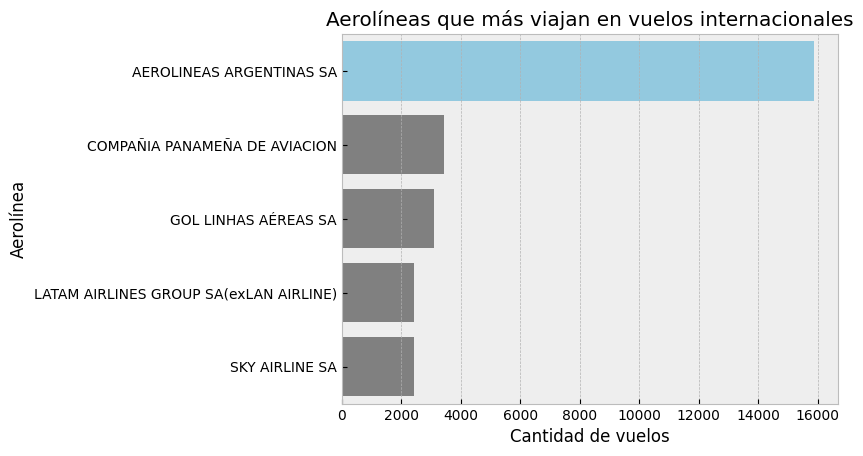

In [ ]:
#Encontrar la cantidad de vuelos de la aerólinea con más vuelos.
max_flight = international_flights_per_airline['Cantidad de Vuelos'].max()

#Filtrar las aerolíneas que tienen la cantidad máxima de vuelos
airlines_with_max_flights = international_flights_per_airline[international_flights_per_airline['Cantidad de Vuelos'] == max_flight]

#Crear un array de colores para las barras
colores = ['grey' if airline not in airlines_with_max_flights['Aerolinea Nombre'].values else 'skyblue'
           for airline in international_flights_per_airline['Aerolinea Nombre']]

#Gráfico 3 con Seaborn
sns.barplot(data=international_flights_per_airline, x='Cantidad de Vuelos', y='Aerolinea Nombre', palette=colores)
plt.xlabel('Cantidad de vuelos')
plt.ylabel('Aerolínea')
plt.title('Aerolíneas que más viajan en vuelos internacionales')

plt.show()

##Grafico 4
La hipótesis primaria a analizar es si la variación de los vuelos argentinos durante el año de pandemia vs. el año sin pandemía y con la mayor parte de la población inoculada fue de más del 100%.

In [ ]:
#Contar los vuelos de 2020
conteo_vuelos_2020 = vuelos_2020['Periodo_year'].value_counts()
conteo_vuelos_2022 = vuelos_2022['Periodo_year'].value_counts()

print(conteo_vuelos_2020)
print(conteo_vuelos_2022)

2020    212726
Name: Periodo_year, dtype: int64
2022    477903
Name: Periodo_year, dtype: int64


In [ ]:
#Calcular la variación porcentual
variacion_porcentual = ((conteo_vuelos_2022[2022] - conteo_vuelos_2020[2020]) / conteo_vuelos_2020[2020]) * 100

#Imprimir la variación porcentual
print(f"Variación porcentual entre 2020 y 2022: {variacion_porcentual:.2f}%")

Variación porcentual entre 2020 y 2022: 124.66%


In [ ]:
df_flights_per_day_2020 = vuelos_2020.groupby('Fecha UTC')['Aerolinea Nombre'].count().reset_index()
df_flights_per_day_2020.rename(columns={'Aerolinea Nombre': 'Cantidad de vuelos'}, inplace=True)
df_flights_per_day_2020.head()

,Fecha UTC,Cantidad de vuelos
0,2020-01-01,901
1,2020-01-02,1479
2,2020-01-03,1455
3,2020-01-04,98
4,2020-01-05,111


In [ ]:
df_flights_per_day_2022 = vuelos_2022.groupby('Fecha UTC')['Aerolinea Nombre'].count().reset_index()
df_flights_per_day_2022.rename(columns={'Aerolinea Nombre': 'Cantidad de vuelos'}, inplace=True)
df_flights_per_day_2022.head()

,Fecha UTC,Cantidad de vuelos
0,2022-01-01,611
1,2022-01-02,844
2,2022-01-03,1101
3,2022-01-04,1672
4,2022-01-05,1238


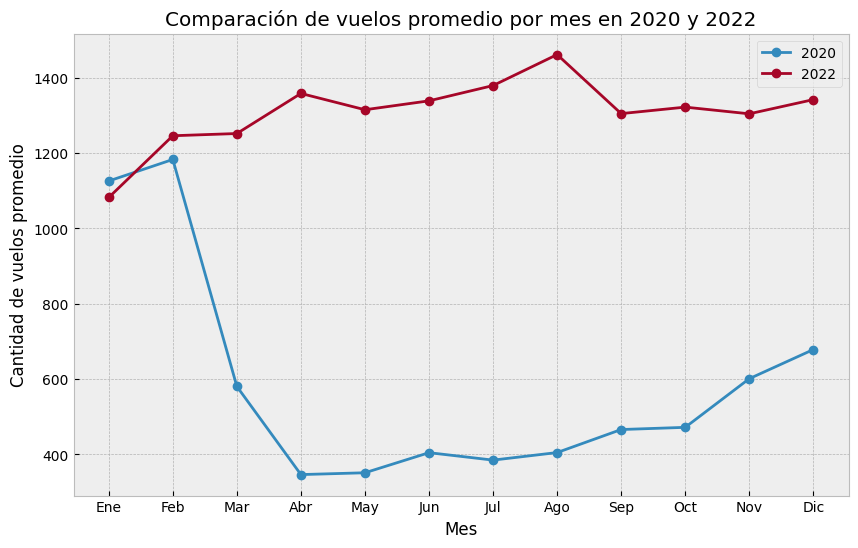

In [ ]:
import matplotlib.pyplot as plt

#Agregar una columna 'Mes' que contenga solo el mes de la fecha
df_flights_per_day_2020['Mes'] = df_flights_per_day_2020['Fecha UTC'].dt.month
df_flights_per_day_2022['Mes'] = df_flights_per_day_2022['Fecha UTC'].dt.month

#Agrupar los datos por mes y calcular el promedio de vuelos para cada año
df_grouped_2020 = df_flights_per_day_2020.groupby('Mes')['Cantidad de vuelos'].mean()
df_grouped_2022 = df_flights_per_day_2022.groupby('Mes')['Cantidad de vuelos'].mean()

#Gráfico 4 con Matplotlib
plt.figure(figsize=(10, 6))

plt.plot(df_grouped_2020.index, df_grouped_2020.values, label='2020', marker='o')
plt.plot(df_grouped_2022.index, df_grouped_2022.values, label='2022', marker='o')

plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos promedio')
plt.title('Comparación de vuelos promedio por mes en 2020 y 2022')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()

plt.grid(True)
plt.show()

##Gráfico 5
La hipótesis secundaria a analizar es si fue mayor la cantidad de personas que salieron del país o la cantidad de personas que ingresaron al país. Y que porcentaje del total de las personas que salieron representa el primer grupo nombrado.


In [ ]:
df_arribos = df_flight_dirty_concat[(df_flight_dirty_concat['Clasificación Vuelo'] == 'Internacional') & (df_flight_dirty_concat['Tipo de Movimiento'] == 'Aterrizaje')]
df_arribos.head()

,Fecha UTC,Hora UTC,ID,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia,variable_sintetica,Periodo_year
0,2020-01-01,2100-01-01 00:06:00,1,Regular,Internacional,Aterrizaje,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,239,239.0,Miércoles,0_EZE_LEMD_Miércoles_Regular,2020
6,2020-01-01,2100-01-01 00:15:00,7,Regular,Internacional,Aterrizaje,AER,SUMU,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR SA,0,20,20.0,Miércoles,0_AER_SUMU_Miércoles_Regular,2020
10,2020-01-01,2100-01-01 00:22:00,11,Regular,Internacional,Aterrizaje,EZE,SBPA,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR SA,0,25,25.0,Miércoles,0_EZE_SBPA_Miércoles_Regular,2020
14,2020-01-01,2100-01-01 00:30:00,15,Regular,Internacional,Aterrizaje,EZE,SKBO,AVIANCA AEROVIAS NACIONALES COLOMBIA,0,48,48.0,Miércoles,0_EZE_SKBO_Miércoles_Regular,2020
15,2020-01-01,2100-01-01 00:32:00,16,Regular,Internacional,Aterrizaje,EZE,SBGR,QATAR AIRWAYS,0,66,66.0,Miércoles,0_EZE_SBGR_Miércoles_Regular,2020


In [ ]:
#Sumar el total de tarjetas de embarque de los aterrizajes de cada año
arribos_2022 = df_arribos[df_arribos['Periodo_year'] == 2022]['PAX'].sum()
arribos_2020 = df_arribos[df_arribos['Periodo_year'] == 2020]['PAX'].sum()

print(f"El total de personas que arribaron al país 2022: {arribos_2022}")
print(f"El total de personas que arribaron al país 2020: {arribos_2020}")

El total de personas que arribaron al país 2022: 4004461.0
El total de personas que arribaron al país 2020: 1687024.0


In [ ]:
df_despegue =  df_flight_dirty_concat[(df_flight_dirty_concat['Clasificación Vuelo'] == 'Internacional') & (df_flight_dirty_concat['Tipo de Movimiento'] == 'Despegue')]

In [ ]:
#Sumar el total de tarjetas de embarque de los despegues de cada año
despegue_2022 = df_despegue[df_despegue['Periodo_year'] == 2022]['PAX'].sum()
despegue_2020 = df_despegue[df_despegue['Periodo_year'] == 2020]['PAX'].sum()

print(f"El total de personas que salieron del país 2022: {despegue_2022}")
print(f"El total de personas que salieron del país 2020: {despegue_2020}")

El total de personas que salieron del país 2022: 4203546.0
El total de personas que salieron del país 2020: 1720850.0


In [ ]:
#Calcular la cantidad de personas que no regresaron en 2022
personas_que_no_regresaron = despegue_2022 - arribos_2022

#Calcular la proporción de personas que no regresaron en comparación con el total de pasajeros que salieron
proporcion_no_regresaron = personas_que_no_regresaron / despegue_2022

#Imprimir los resultados
print(f"La cantidad de personas que no regresaron en el 2022: {personas_que_no_regresaron} que presenta el {proporcion_no_regresaron:.2%}")

La cantidad de personas que no regresaron en el 2022: 199085.0 que presenta el 4.74%


In [ ]:
#Calcular la cantidad de personas que no regresaron en 2020
personas_que_no_regresaron = despegue_2020 - arribos_2020

#Calcular la proporción de personas que no regresaron en comparación con el total de pasajeros que salieron
proporcion_no_regresaron = personas_que_no_regresaron / despegue_2020

print(f"La cantidad de personas que no regresaron en el 2020: {personas_que_no_regresaron} que presenta el {proporcion_no_regresaron:.2%}")

La cantidad de personas que no regresaron en el 2020: 33826.0 que presenta el 1.97%


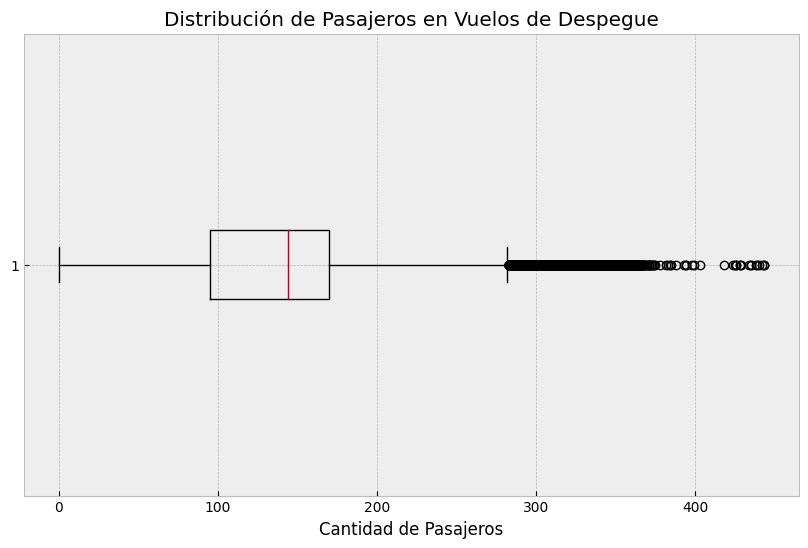

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Filtrar por tipo de movimiento y cantidad de pasajeros
tipo_movimiento = 'Despegue'
df_filtrado_despegue = vuelos_2022[vuelos_2022['Tipo de Movimiento'] == tipo_movimiento]
df_filtrado_despegue = vuelos_2022[vuelos_2022['Pasajeros'] != 0]
df_filtrado_despegue = vuelos_2022[vuelos_2022['Clase de Vuelo (todos los vuelos)'] == 'Regular']

plt.figure(figsize=(10, 6))
plt.boxplot(df_filtrado_despegue['Pasajeros'], vert=False)
plt.xlabel('Cantidad de Pasajeros')
plt.title(f'Distribución de Pasajeros en Vuelos de {tipo_movimiento}')
plt.grid(True)

plt.show()

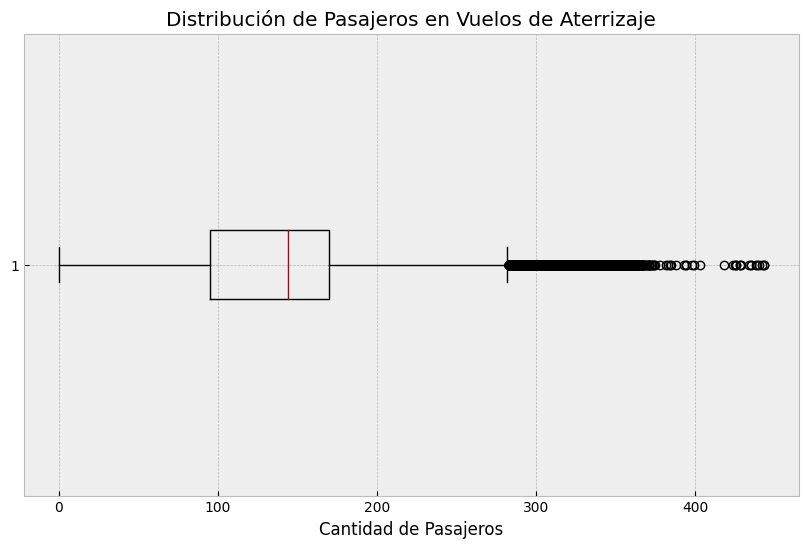

In [ ]:
#Filtrar por tipo de movimiento y cantidad de pasajeros
tipo_movimiento = 'Aterrizaje'
df_filtrado_aterrizaje = vuelos_2022[vuelos_2022['Tipo de Movimiento'] == tipo_movimiento]
df_filtrado_aterrizaje = vuelos_2022[vuelos_2022['Pasajeros'] != 0]
df_filtrado_aterrizaje = vuelos_2022[vuelos_2022['Clase de Vuelo (todos los vuelos)'] == 'Regular']


plt.figure(figsize=(10, 6))
plt.boxplot(df_filtrado_aterrizaje['Pasajeros'], vert=False)

plt.xlabel('Cantidad de Pasajeros')
plt.title(f'Distribución de Pasajeros en Vuelos de {tipo_movimiento}')
plt.grid(True)

plt.show()



#*Conclusiones: Interpretación de cada una de las visualizaciones de los gráficos*

1° ¿Cual es la hora pico de vuelos en el territorio argentino? Interpretando el gráfico las 15 horas es pico de vuelos en el territorio argentino.

2° ¿Cual es el día de la semana donde hay más aeronaves sobrevolando el territorio nacional? De la interpretación del gráfico se desprende que el día de la semana donde hay más aeronaves sobrevolando el territorio nacional es el día jueves.

3° ¿Cuales son las 5 aerolneas con más vuelos en el país? Según la información arrojada por el gráfico realizado en Matplotlib las 5 aerolíneas de vuelos domésticos que más vuelan son:


* AEROLINEAS ARGENTINAS SA   con    155998 vuelos.
* JETSMART AIRLINES SA          con  24846 vuelos.
-FB LÍNEAS AÉREAS - FLYBONDI    con 24469 vuelos.
-LADE                       con      4196 vuelos.
-AMERICAN JET SA               con   3690 vuelos.

Y las 5 aerolíneas de vuelos internacionales que más vuelan son según el gráfico de Seaborn son:

- AEROLINEAS ARGENTINAS SA	  con 15878 vuelos.
-	COMPAÑIA PANAMEÑA DE AVIACION	  con 3445 vuelos.
-	GOL LINHAS AÉREAS SA	  con 3092 vuelos.
-	LATAM AIRLINES GROUP SA(exLAN AIRLINE)  con	2440 vuelos.
-	SKY AIRLINE SA   con	2415 vuelos.

4° Analice la hipotesis primaria que suponia que la variación de los vuelos argentinos durante el año de pandemia vs. el año sin pandemía y con la mayor parte de la población inoculada fue del 100% y conluimos que fue mayor a nuestra estimación.

5° Analice la hipotesis secundaria y en ambos años fue mayor la cantidad de pesajeros que participaron de los despegues internacionales que de los arribos internacionales, por lo tanto, salieron más pasajeros que los que ingresaron. Además calculé la proporción que esto representa en el total de vuelos.

#---------MACHINE LEARNING----------
Buscaré un modelo de regresión que se ajuste a lo que deseo predecir.
Intento predecir la cantidad de pasajeros que tiene un vuelo. ¿Cual es el modelo de regresión que mejor predice la varible 'Pasajeros'?

Hipótesis:

1°) Se puede predecir con una aproximación menor a 1?

2°) Las variables 'Clasificación Vuelo', 'Aeronave' y 'Aerolinea Nombre' son suficientes para predecir con aproximación?



---


#**Preprosesamiento del dataset**

Se realizarán los procesos de *Encoding, Feature Engineering* para luego ejecutar el entrenamiento de modelos de Machine Learning.

Etapas: I) Encoding, II) Ingeniería de atributos y III) Entrenamiento de un modelo de Machine Learning Supervisado (Regresión).

Para la parte de ML trabajaré con los vuelos tipo "regulares" solo del año 2022 ya que si considero los vuelos del año 2020 si bien las observaciones está bien tomados por ser un año pandémico los vuelos no siguieron el flujo normal.

Además utilicé esta BD externa que clasifica los aeropuertos en PUBLICOS y PRIVADOS. Ya que para mi modelo de predicción solo consultaré los aeropuertos públicos.
https://datosabiertos.aeroterra.com/datasets/c096d2a078c64be5a4fd05cf9814d6ba_0/about

Esta distinción ya está hecha en el archivo "ML_Clearing.csv" que importo a continuación:

In [ ]:
#Importo un nuevo dataset curado donde considero solo vuelos regulares con aeropuertos argentinos púbicos y aeropuertos internacionales. Eliminé las lineas que contemplaban aeropuertos privados.

import pandas as pd
url="https://raw.githubusercontent.com/FlorenciaBezmalinovich/Proyectos_ML/main/Proyecto_Final_DS/Archivos_Soporte/ML_Cleaning.csv"

regular_vuelos_2022= pd.read_csv(url, delimiter=',', encoding='utf-8')


In [ ]:
regular_vuelos_2022.head()

,Fecha UTC,Hora UTC,Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia
0,01/01/2022,00:01,Doméstico,Aterrizaje,AER,ECA,AEROLINEAS ARGENTINAS SA,BO-737-8SH,138.0,69.0,sábado
1,01/01/2022,00:05,Doméstico,Despegue,IGU,AER,JETSMART AIRLINES SA,AIB-A320-232,82.0,41.0,sábado
2,01/01/2022,00:05,Doméstico,Aterrizaje,AER,SAL,AEROLINEAS ARGENTINAS SA,BO-B737-8,129.0,65.0,sábado
3,01/01/2022,00:09,Doméstico,Aterrizaje,AER,GAL,AEROLINEAS ARGENTINAS SA,BO-B737-81D,145.0,73.0,sábado
4,01/01/2022,00:09,Internacional,Despegue,EZE,KDFW,AMERICAN AIRLINES INC,NO INFORMADO,261.0,261.0,sábado


In [ ]:
regular_vuelos_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258566 entries, 0 to 258565
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fecha UTC            258566 non-null  object 
 1   Hora UTC             258566 non-null  object 
 2   Clasificación Vuelo  258566 non-null  object 
 3   Tipo de Movimiento   258566 non-null  object 
 4   Aeropuerto           258566 non-null  object 
 5   Origen / Destino     258566 non-null  object 
 6   Aerolinea Nombre     258566 non-null  object 
 7   Aeronave             258566 non-null  object 
 8   Pasajeros            258418 non-null  float64
 9   PAX                  258418 non-null  float64
 10  Nombre_Dia           258566 non-null  object 
dtypes: float64(2), object(9)
memory usage: 21.7+ MB


##I) Ingeniería de atributos

I.I) **Tratamiento de valores nulos** : Las variables 'Pasajeros' y 'PAX' tienen valores nulos. Entonces utilizaré imputación como técnica de Freature Selection **interpolando** los valores.

In [ ]:
import pandas as pd

#Convertir en numérica la variable 'Pasajeros'
regular_vuelos_2022['Pasajeros'] = pd.to_numeric(regular_vuelos_2022['Pasajeros'], errors='coerce')

#Aplicar la interpolación a los datos nulos en 'Pasajeros'
regular_vuelos_2022['Pasajeros'].interpolate(method='linear', inplace=True)

#Convertir en numérica la variable 'PAX'
regular_vuelos_2022['PAX'] = pd.to_numeric(regular_vuelos_2022['PAX'], errors='coerce')

#Aplicar la interpolación a los datos nulos en 'PAX'
regular_vuelos_2022['PAX'].interpolate(method='linear', inplace=True)

In [ ]:
regular_vuelos_2022.head()

,Fecha UTC,Hora UTC,Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia
0,01/01/2022,00:01,Doméstico,Aterrizaje,AER,ECA,AEROLINEAS ARGENTINAS SA,BO-737-8SH,138.0,69.0,sábado
1,01/01/2022,00:05,Doméstico,Despegue,IGU,AER,JETSMART AIRLINES SA,AIB-A320-232,82.0,41.0,sábado
2,01/01/2022,00:05,Doméstico,Aterrizaje,AER,SAL,AEROLINEAS ARGENTINAS SA,BO-B737-8,129.0,65.0,sábado
3,01/01/2022,00:09,Doméstico,Aterrizaje,AER,GAL,AEROLINEAS ARGENTINAS SA,BO-B737-81D,145.0,73.0,sábado
4,01/01/2022,00:09,Internacional,Despegue,EZE,KDFW,AMERICAN AIRLINES INC,NO INFORMADO,261.0,261.0,sábado


In [ ]:
regular_vuelos_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258566 entries, 0 to 258565
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fecha UTC            258566 non-null  object 
 1   Hora UTC             258566 non-null  object 
 2   Clasificación Vuelo  258566 non-null  object 
 3   Tipo de Movimiento   258566 non-null  object 
 4   Aeropuerto           258566 non-null  object 
 5   Origen / Destino     258566 non-null  object 
 6   Aerolinea Nombre     258566 non-null  object 
 7   Aeronave             258566 non-null  object 
 8   Pasajeros            258566 non-null  float64
 9   PAX                  258566 non-null  float64
 10  Nombre_Dia           258566 non-null  object 
dtypes: float64(2), object(9)
memory usage: 21.7+ MB


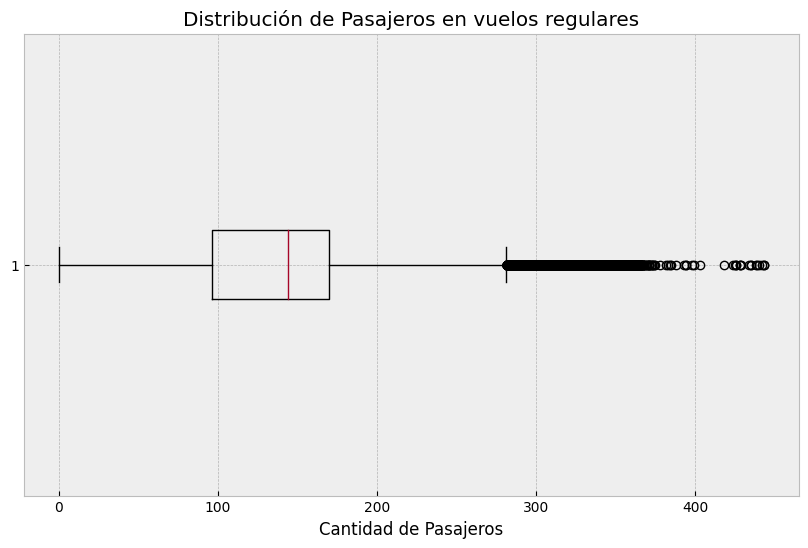

In [ ]:
#EDA - Conocer el compartamiento de la variable a predecir
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.boxplot(regular_vuelos_2022['Pasajeros'], vert=False)
plt.xlabel('Cantidad de Pasajeros')
plt.title(f'Distribución de Pasajeros en vuelos regulares')
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd

# Consultar todas als filas de la variable 'Pasajeros' para un mejor entendimiento de la situación.
pd.set_option('display.max_rows', None)
counts = regular_vuelos_2022.Pasajeros.value_counts()
composicion_pasajeros = pd.DataFrame({'Cantidad de pasajeros': counts.index, 'Veces que se repite esa cantidad': counts.values})
print(composicion_pasajeros)

     Cantidad de pasajeros  Veces que se repite esa cantidad
0                    170.0                              5884
1                    171.0                              5429
2                    172.0                              4707
3                    169.0                              4358
4                      0.0                              4284
5                    168.0                              3999
6                     96.0                              3895
7                    173.0                              3791
8                    167.0                              3699
9                    166.0                              3347
10                    97.0                              3250
11                   174.0                              3152
12                   165.0                              3125
13                    95.0                              2928
14                   164.0                              2768
15                   160

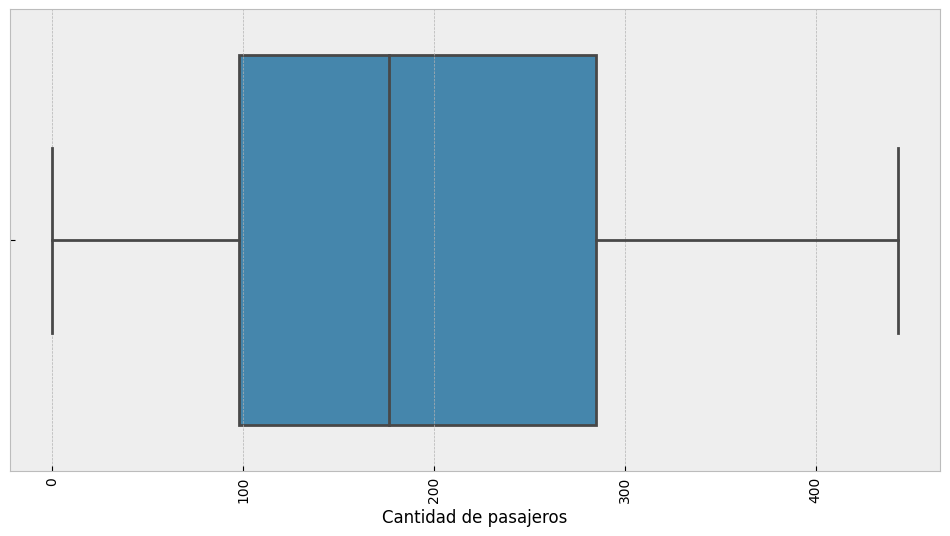

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cantidad de pasajeros', data=composicion_pasajeros)
plt.xticks(rotation=90)
plt.show()

I.II) **Tratamiento de OUTLIERS** : La variable 'Pasajeros' tambien tiene muchos outliers. Lo intentaré solucionar aplicando la técnica de Freature Selection aplicando **rango intercuartílico**.

In [ ]:
import pandas as pd

# Calcular el IQR y los límites utilizando composicion_pasajeros
Q1 = composicion_pasajeros['Cantidad de pasajeros'].quantile(0.25)
Q3 = composicion_pasajeros['Cantidad de pasajeros'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Aplicar el filtro IQR al DataFrame original
regular_vuelos_2022_so = regular_vuelos_2022[
    (regular_vuelos_2022['Pasajeros'] >= lower_limit) &
    (regular_vuelos_2022['Pasajeros'] <= upper_limit)
]

##II) Encoding

Para los siguientes pasos como tengo que realizar relaciones entre variables procedé a encodear todas las observaciones de mi dataset

In [ ]:
regular_vuelos_2022_so.columns

Index(['Fecha UTC', 'Hora UTC', 'Clasificación Vuelo', 'Tipo de Movimiento',
       'Aeropuerto', 'Origen / Destino', 'Aerolinea Nombre', 'Aeronave',
       'Pasajeros', 'PAX', 'Nombre_Dia'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Transformaciones
#Seleccionar las columnas categóricas para aplicar Label Encoding
columnas_categoricas = ['Fecha UTC', 'Hora UTC', 'Clasificación Vuelo', 'Tipo de Movimiento',
       'Aeropuerto', 'Origen / Destino', 'Aerolinea Nombre', 'Aeronave','Pasajeros', 'PAX', 'Nombre_Dia']

#Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

#Aplicar Label Encoding a las columnas categóricas
for columna in columnas_categoricas:
    regular_vuelos_2022_so[columna] = label_encoder.fit_transform(regular_vuelos_2022_so[columna])

regular_vuelos_2022_so.head()

,Fecha UTC,Hora UTC,Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Nombre_Dia
0,0,1,0,0,0,25,4,44,171,88,5
1,0,5,0,1,16,2,83,6,92,45,5
2,0,5,0,0,0,118,4,50,156,80,5
3,0,9,0,0,0,41,4,52,181,94,5
4,0,9,1,1,12,56,19,132,318,306,5


##Freature Selection: EDA

Conocer la correlación de la variable 'Pasajeros' con las demás variables.

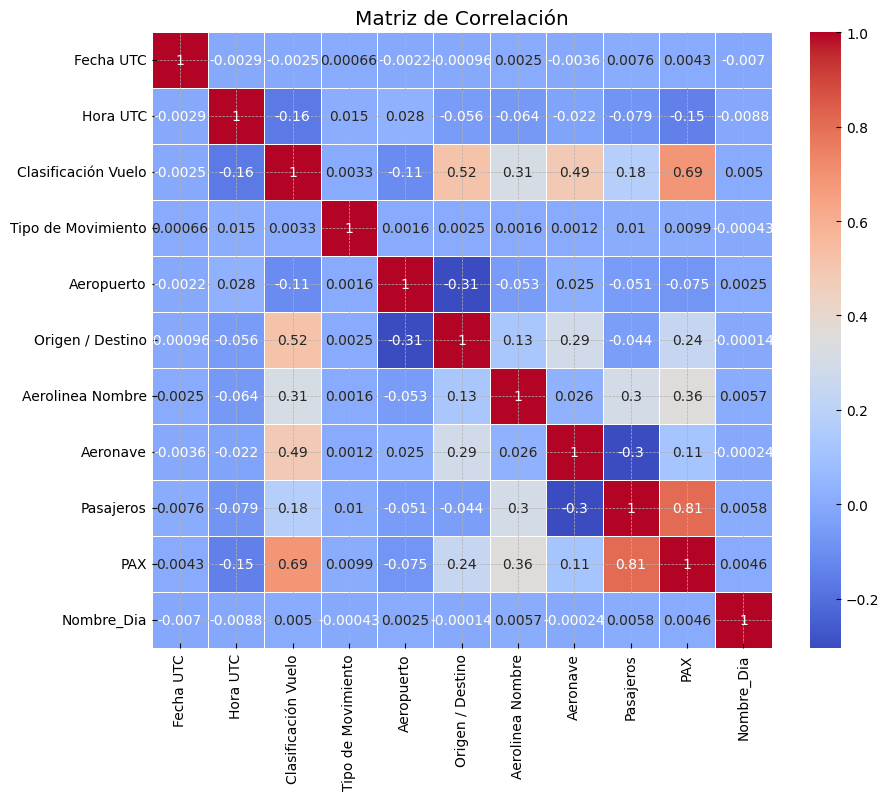

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = regular_vuelos_2022_so.corr()

#Visualizar la matriz de correlación como un mapa de calor para averiguar como correlacionan las demás variables con 'Pasajeros'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

**DETECCIÓN DE OUTLIERS**: Quiero detectar outliers y para ello utilizaré la técnica LOF (Local Outlier Factor) para identificar las relaciones locales de proximidad entre puntos de datos.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

#Crear un objeto LOF
lof = LocalOutlierFactor(n_neighbors=20)

#Aplicar LOF a los datos y obtener las etiquetas de atipicidad
outlier_labels = lof.fit_predict(regular_vuelos_2022_so)

#Contar la cantidad de valores atípicos (etiquetados como -1)
num_outliers = len(outlier_labels[outlier_labels == -1])

#Calcular el porcentaje de valores atípicos en la variable
porcentaje_atipicos = (num_outliers / len(outlier_labels)) * 100

print(f"Número de valores atípicos: {num_outliers}")
print(f"Porcentaje de valores atípicos: {porcentaje_atipicos}%")

Número de valores atípicos: 1624
Porcentaje de valores atípicos: 0.6280794845416644%


In [ ]:
# Filtrar los datos para eliminar los valores atípicos
regular_vuelos_2022_so = regular_vuelos_2022_so[outlier_labels == 1]
regular_vuelos_2022_so.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256942 entries, 0 to 258565
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Fecha UTC            256942 non-null  int64
 1   Hora UTC             256942 non-null  int64
 2   Clasificación Vuelo  256942 non-null  int64
 3   Tipo de Movimiento   256942 non-null  int64
 4   Aeropuerto           256942 non-null  int64
 5   Origen / Destino     256942 non-null  int64
 6   Aerolinea Nombre     256942 non-null  int64
 7   Aeronave             256942 non-null  int64
 8   Pasajeros            256942 non-null  int64
 9   PAX                  256942 non-null  int64
 10  Nombre_Dia           256942 non-null  int64
dtypes: int64(11)
memory usage: 23.5 MB


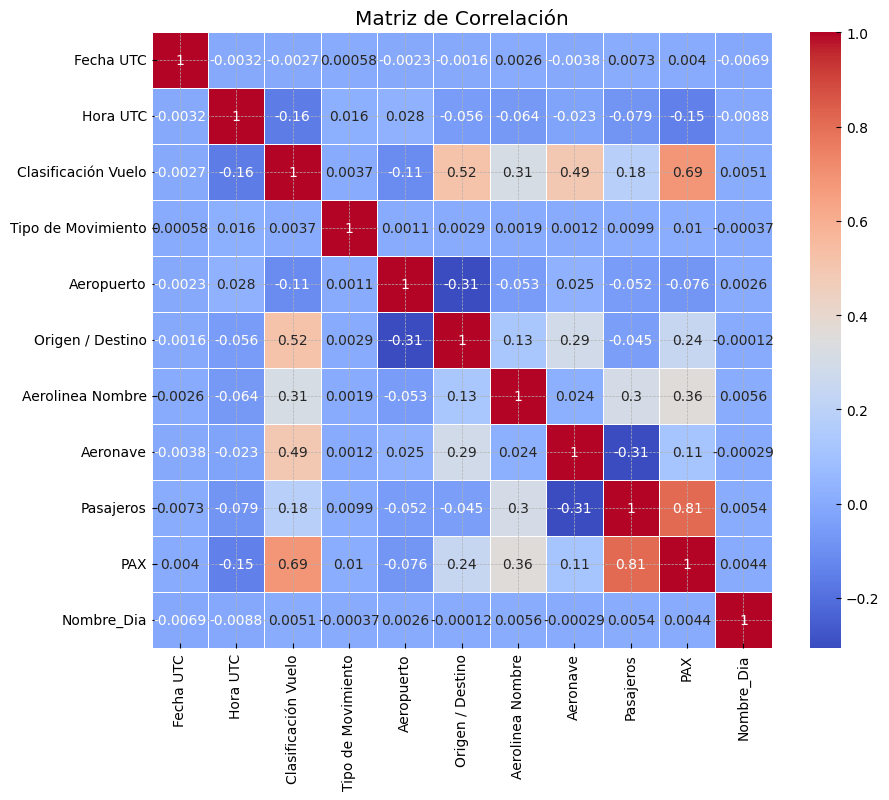

In [ ]:
#EDA - Conocer el comportamiento de la variable 'Pasajeros' despues de eliminar observaciones con outliers.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = regular_vuelos_2022_so.corr()

#Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
#Imprimir correlaciones individiales
print(f"La correlación de pasajeros con Fecha UTC es de:{regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Fecha UTC'])}")
print(f"La correlación de pasajeros con Hora UTC es de:{regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Hora UTC'])}")
print(f"La correlación de pasajeros con Clasificación Vuelo es de:{regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Clasificación Vuelo'])}")
print(f"La correlación de pasajeros con Tipo de Movimeinto es de:{regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Tipo de Movimiento'])}")
print(f"La correlación de pasajeros con Aeropuerto es de:{regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Aeropuerto'])}")
print(f"La correlación de pasajeros con Origen / Destino es de:{regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Origen / Destino'])}")
print(f"La correlación de pasajeros con Aerolinea Nombre es de: {regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Aerolinea Nombre'])}")
print(f"La correlación de pasajeros con Aeronave es de: {regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Aeronave'])}")
print(f"La correlación de pasajeros con Nombre_Dia es de: {regular_vuelos_2022_so['Pasajeros'].corr(regular_vuelos_2022_so['Nombre_Dia'])}")

La correlación de pasajeros con Fecha UTC es de:0.007254716321595994
La correlación de pasajeros con Hora UTC es de:-0.07930302006251176
La correlación de pasajeros con Clasificación Vuelo es de:0.17857667458981788
La correlación de pasajeros con Tipo de Movimeinto es de:0.009925659449075943
La correlación de pasajeros con Aeropuerto es de:-0.05172742215271991
La correlación de pasajeros con Origen / Destino es de:-0.04487496492048089
La correlación de pasajeros con Aerolinea Nombre es de: 0.30143677329847673
La correlación de pasajeros con Aeronave es de: -0.30687028912525444
La correlación de pasajeros con Nombre_Dia es de: 0.005449164721809648


Con mi variable Pasajeros, la variable con correlación positiva más fuerte es Aerolínea Nombre seguida por Clasificaicón Vuelo. La variable con correlación negativa más fuerte es Aeronave seguida por Origen/Destino.Las demas variables tiene una correlación bastante debil y no son potencialmente relevantes.

Cabe aclarar que aun no sabemos si se cumple la hipótesis 2, ejecutaremos un PCA para ello.

#III) Entrenamiento de modelos de Machine Learning Supervisados

En este caso utilizaré los modelos **regresión lineal múltiple** y **random forest** donde intentaré predecir la variable de respuesta o dependiente (Pasajeros) basandome en variables predictoras (variables independientes) que son las demás columnas categóricas.

##1°) RLM

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = regular_vuelos_2022_so.drop(columns=['Pasajeros'])
y = regular_vuelos_2022_so['Pasajeros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rlm_modelo = LinearRegression()

rlm_modelo.fit(X_train, y_train)

y_pred = rlm_modelo.predict(X_test)

rlm_mse = mean_squared_error(y_test, y_pred)
rlm_r2 = r2_score(y_test, y_pred)
rlm_rmse = np.sqrt(rlm_mse)

print("Root Mean Squared Error (RMSE):", rlm_rmse)
print("Mean Squared Error:", rlm_mse)
print("R-squared:", rlm_r2)


Root Mean Squared Error (RMSE): 15.825401245421732
Mean Squared Error: 250.44332457859574
R-squared: 0.9487617502250628


##2°) RamdomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = regular_vuelos_2022_so.drop(columns=['Pasajeros'])
y = regular_vuelos_2022_so['Pasajeros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_modelo = RandomForestRegressor(n_estimators=100, random_state=42)

rf_modelo.fit(X_train, y_train)

y_pred = rf_modelo.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

Root Mean Squared Error (RMSE): 1.169382508658215
Mean Squared Error: 1.3674554515557802
R-squared: 0.9997202320161624


##3°) PCA PARA RLM CON 2 VARIABLES SINTÉTICAS

Variables sintéticas. Crearé 2 variables sintéticas ponderando un 50% cada una de las variables con correlación positiva y negativa. Además como cuando realice el encodeamiento de mi modelo se consideró el '0'. Para evitar que al multiplicar la variable como resultado me dé 0 es que le sumo 1 a cada valor. Intentaré incorporar el concepto de Boosting.



In [ ]:
# Crear las variables sintéticas con corrección de valores nulos sumando +1 para que las variables que el encoding quedó en 0 sumen 1.
regular_vuelos_2022_so['Variable_Sintetica_1'] = 0.5 * (regular_vuelos_2022_so['Clasificación Vuelo'] + 1) + 0.5 * (regular_vuelos_2022_so['Aerolinea Nombre'] + 1)
regular_vuelos_2022_so['Variable_Sintetica_2'] = 0.5 * (regular_vuelos_2022_so['Aeropuerto'] + 1) + 0.5 * (regular_vuelos_2022_so['Aeronave'] + 1)


In [ ]:
# Incluir las nuevas variables sintéticas
X = regular_vuelos_2022_so.drop(columns=['Pasajeros'])
X['Variable_Sintetica_1'] = regular_vuelos_2022_so['Variable_Sintetica_1']
X['Variable_Sintetica_2'] = regular_vuelos_2022_so['Variable_Sintetica_2']
y = regular_vuelos_2022_so['Pasajeros']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['Variable_Sintetica_1', 'Variable_Sintetica_2']] = scaler.fit_transform(X[['Variable_Sintetica_1', 'Variable_Sintetica_2']])

PCA con 2 variables

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)

linear_regression_model = LinearRegression()

rlm_pca_modelo = Pipeline([('pca', pca), ('linear_regression', linear_regression_model)])

rlm_pca_modelo.fit(X_train, y_train)

y_pred = rlm_pca_modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Root Mean Squared Error (RMSE): 69.66961211944401
Mean Squared Error: 4853.85485287378
R-squared: 0.0069488666095869345


Hiper parámetros al PCA sobre la regresión lineal múltiple.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

regression_model = LinearRegression()

pca = PCA()

scaler = StandardScaler()

# Crear un pipeline que incluye la normalización, PCA y el modelo de regresión lineal
pipeline = Pipeline([
    ('scaler', scaler),
    ('reduce_dim', pca),
    ('regressor', regression_model)
])

param_grid = {
    'reduce_dim__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], #Hiper parámetros a buscar
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", best_params)

y_pred = best_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packa

Mejores hiperparámetros: {'reduce_dim__n_components': 11}
MSE: 253.90787884440772
RMSE: 15.93448709072268
R-squared: 0.9484063749813374


**Conclusión modelo 3**:
Aplicando PCA y realizando hipertunning de parámetros con todas las variables la mejora es infima. Si comparamos sus resultados con los resultados de la regresión lineal múltiple realizada en el punto 1 practicamente no hay diferencias y no se acerca al RandomForest.

##Cuadro comparativo de modelos

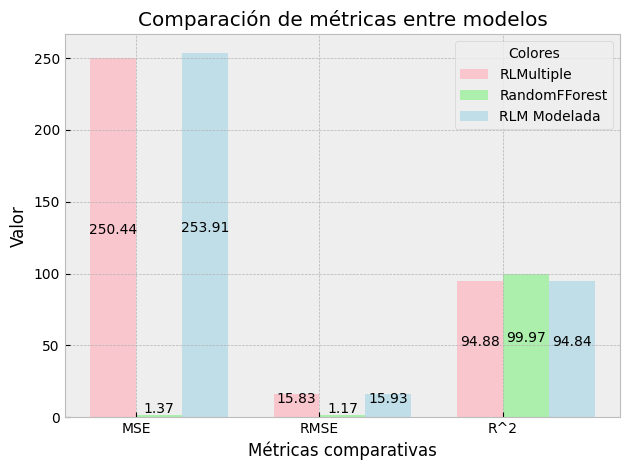

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de las métricas
rlm_mse = 250.44332457859574
rlm_rmse = 15.825401245421732
rlm_r2 = 0.9487617502250628*100

rf_mse = 1.3674554515557802
rf_rmse = 1.169382508658215
rf_r2 = 0.9997202320161624*100

rlm_pca_hyp_mse = 253.90787884440772
rlm_pca_hyp_rmse = 15.93448709072268
rlm_pca_hyp_r2 = 0.9484063749813374*100

# Nombrar de las métricas
metric_names = ['MSE', 'RMSE', 'R^2']

# Traer valores de las métricas para los 3 modelos
rlm_metrics = [rlm_mse, rlm_rmse, rlm_r2]
rf_metrics = [rf_mse, rf_rmse, rf_r2]
rlm_pca_hyp_metrics = [rlm_pca_hyp_mse, rlm_pca_hyp_rmse, rlm_pca_hyp_r2]

# Posiciones para las barras
index = np.arange(len(metric_names))
bar_width = 0.25


fig, ax = plt.subplots()
ax.set_xlabel('Métricas comparativas')
ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas entre modelos')

bars1 = plt.bar(index, rlm_metrics, bar_width, label='RLMultiple', color='lightpink', alpha=0.7)
bars2 = plt.bar(index + bar_width, rf_metrics, bar_width, label='RandomFForest', color='lightgreen', alpha=0.7)
bars3 = plt.bar(index + bar_width*2, rlm_pca_hyp_metrics, bar_width, label='RLM Modelada', color='lightblue', alpha=0.7)

# Etiquetas en el medio de las barras
for bar1, bar2, bar3 in zip(bars1, bars2, bars3):
    x1, x2, x3 = bar1.get_x() + bar1.get_width() / 2, bar2.get_x() + bar2.get_width() / 2, bar3.get_x() + bar3.get_width() / 2
    y1, y2, y3 = bar1.get_height(), bar2.get_height(), bar3.get_height()
    ax.text(x1, y1 / 2, f'{y1:.2f}', ha='center', va='bottom')
    ax.text(x2, y2 / 2, f'{y2:.2f}', ha='center', va='bottom')
    ax.text(x3, y3 / 2, f'{y3:.2f}', ha='center', va='bottom')

# Configurar etiquetas de ejes x
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names)

# Agregar una leyenda para especificar los colores
plt.legend(loc='upper right', title='Colores')
plt.tight_layout()

plt.show()

**Conclusión general**: Evaluaré las métricas indivudualmente y en base a esto seleccionaré un modelo con el cual trabajar. En primer lugar analizaré el MSE (Error Cuadrático Medio) que cuanto menor sea mejor se ajustará el modelo a los datos. Con las métricas expuestas, el modelo Random Forest tiene el MSE más bajo. En segundo lugar analizaré el RMSE (Error Cuadrático Medio Raíz) que tiene la misma interpretación que el MSE y así nuevamente, el RandomForest tiene el RMSE más bajo, lo que significa que las predicciones son más precisas.
Para finalizar analizaré el R2 (Coeficiente de Determinación) donde el RandomForest tiene el R2 más alto y por ello el modelo explica mejor la varianza en los datos de pasajeros

Luego de evaluar los 3 modelos con los cuales trabajé anteriormente. Trabajaré con el modelo de RandomForest ya que supera claramente a los otros dos modelos en todas las métricas. Tiene un MSE y RMSE significativamente más bajos, lo que indica un mejor ajuste a los datos, y un R2 más alto, lo que sugiere una mejor capacidad para explicar la varianza en los datos de pasajeros.



#Evaluando modelos de Machine Learning

---
Evaluar el RandomForest que es mi modelo seleccionado


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

CV_modelo = rf_modelo

scores = cross_val_score(CV_modelo, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_promedio = np.sqrt(-scores).mean()

print("RMSE promedio (validación cruzada):", rmse_promedio)

RMSE promedio (validación cruzada): 1.1333098583708927



A continuación, con el objetivo de mejorar las métricas en la validación de mi modelo la idea es
experimentar con diferentes configuraciones de hiper parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

modelo = rf_modelo

param_grid = {
    'n_estimators': [10, 25, 50], #Hiper parámetros para buscar
    'max_depth': [4, 5, 6],
}

grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X, y)

# Obtener los mejores hiper parámetros y el mejor modelo
mejores_hiperparametros = grid_search.best_params_
mejor_modelo = grid_search.best_estimator_

print("Mejores hiperparámetros:", mejores_hiperparametros)

# Validación cruzada
scores = cross_val_score(mejor_modelo, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_promedio = np.sqrt(-scores).mean()
print("RMSE promedio (validación cruzada con mejores hiperparámetros):", rmse_promedio)


Mejores hiperparámetros: {'max_depth': 6, 'n_estimators': 10}
RMSE promedio (validación cruzada con mejores hiperparámetros): 5.636756166039213


##Crossvalidation y mejora de modelos de ML

Entrenaré el modelo de RandomForest que es el modelo elegido con las mismas variables pero aplicando K-ford CV y así realizaré la validación del modelo seleccionado.



In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

rf_modelo_nuevo = RandomForestRegressor(n_estimators=100, random_state=42)

# Validación cruzada k-fold
k = 5
scores = cross_val_score(rf_modelo_nuevo, X, y, scoring='neg_mean_squared_error', cv=k)

# Calcula el RMSE promedio a partir de los puntajes negativos de MSE
rmse_scores = (-scores)**0.5
mean_rmse = rmse_scores.mean()

print("RMSE promedio (k-fold cross-validation):", mean_rmse)

RMSE promedio (k-fold cross-validation): 1.1333098583708927


In [ ]:
from sklearn.model_selection import cross_val_predict
import numpy as np

# Obtener las predicciones para cada pliegue
y_pred_kfold = cross_val_predict(rf_modelo_nuevo, X, y, cv=5)

# Calcular el error absoluto y el error porcentual para cada pliegue
errors = y - y_pred_kfold
percent_errors = (errors / y) * 100

# Crear un DataFrame para mostrar los resultados por pliegue
results_df = pd.DataFrame({'Real': y, 'Predicho': y_pred_kfold, 'Error': errors, 'Error_porcentual': percent_errors})

print("Resultados por pliegue:")
print(results_df)

rmse_scores = (-scores)**0.5
mean_rmse = rmse_scores.mean()
print("RMSE promedio (k-fold cross-validation):", mean_rmse)

Resultados por pliegue:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Crear un DataFrame para comparar valores reales y predichos
df = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})

# Calcular el sesgo y el error porcentual
df['Sesgo'] = df['Real'] - df['Predicho']
df['Error_porcentual'] = ((df['Real'] - df['Predicho']) / df['Real']) * 100

df.head()

,Real,Predicho,Sesgo,Error_porcentual
85788,170,171.21,-1.21,-0.711765
8200,232,232.84,-0.84,-0.362069
118301,98,98.47,-0.47,-0.479592
153767,174,174.00,0.00,0.000000
55943,114,113.34,0.66,0.578947


**Conclusión general del modelo seleccionado:** Un RMSE promedio de 1.13 significa que, en promedio, las predicciones del modelo se desvían en alrededor de 1,13 unidades de la variable objetivo, es decir,  tiene un buen nivel de precisión en la predicción de la variable 'Pasajeros'.

Además, responderé las hipótesis primarias:

1°) El modelo encontrado puede predecir con una aproximación menor a 1? No, el modelo encontrado predice con una aproximación mayor a 1.

2°) Las variables 'Clasificación Vuelo', 'Aeronave' y 'Aerolinea Nombre' son suficientes para predecir con aproximación? No, cuando aplico PCA la cantidad óptima de componentes principales para predecir de manera óptima es de 11, es decir, superan esas 4 variables.